## Exploratory Data Analysis

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np

import seaborn as sns
sns.set(font_scale = 1.5)

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('fivethirtyeight')

In [2]:
#loading the complete data into a pandas dataframe
all_features = pd.read_csv('../data-sources/capstone-project/agg-data/airport-weather-agg.csv',
                                  infer_datetime_format=True)

In [3]:
#converting the 'time' column into pandas datetime type
all_features['time'] = pd.to_datetime(all_features['time'])

In [4]:
#getting an overview of the dataframe
all_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10815375 entries, 0 to 10815374
Data columns (total 30 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   time                   datetime64[ns]
 1   origin                 object        
 2   latitude               float64       
 3   longitude              float64       
 4   elevation              float64       
 5   carrier                object        
 6   tail_num               object        
 7   precipitation          float64       
 8   condition              float64       
 9   cloud_base             float64       
 10  dew_temp               float64       
 11  pressure               float64       
 12  air_temp               float64       
 13  visibility             float64       
 14  wind_speed             float64       
 15  wind_direction         object        
 16  dep_delay              float64       
 17  carrier_delay          float64       
 18  extreme_weather_dela

In [5]:
#printing out the number of missing values in each column
all_features.isnull().sum()

time                            0
origin                          0
latitude                        0
longitude                       0
elevation                       0
carrier                         0
tail_num                    21818
precipitation                   0
condition                       0
cloud_base                      0
dew_temp                        0
pressure                        0
air_temp                        0
visibility                      0
wind_speed                      0
wind_direction                  0
dep_delay                  165837
carrier_delay                   0
extreme_weather_delay           0
weather_delay                   0
nas_delay                       0
security_delay                  0
late_aircraft_delay             0
cancelled                       0
cancellation_code        10645359
diverted                        0
destination                     0
arr_delay                  198310
air_time                   196928
distance      

In [6]:
#describing the data
all_features.describe(include='all', datetime_is_numeric=True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
time,10815375,NaN,NaN,NaN,2018-07-29 11:28:09.876109312,2017-01-01 00:14:00,2017-11-10 22:45:00,2018-08-07 18:20:00,2019-04-25 20:29:00,2019-12-31 23:59:00,NaN
origin,10815375,20,ATL,1149710,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,1.08154e+07,NaN,NaN,NaN,37.6157,28.4339,33.6301,37.6197,40.7794,47.4444,4.71616
longitude,1.08154e+07,NaN,NaN,NaN,-94.4165,-122.365,-111.969,-87.9316,-81.325,-71.0097,16.3063
elevation,1.08154e+07,NaN,NaN,NaN,296.58,2.1,27.4,192.3,307.8,1650.2,437.557
carrier,10815375,18,DL,1964692,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tail_num,10793557,7179,N313DN,3904,NaN,NaN,NaN,NaN,NaN,NaN,NaN
precipitation,1.08154e+07,NaN,NaN,NaN,0.107234,0,0,0,0,98,0.902084
condition,1.08154e+07,NaN,NaN,NaN,3.76571,1,2,3,4,27,3.30394
cloud_base,1.08154e+07,NaN,NaN,NaN,11933.9,0,1676,7620,22000,22000,9633.38


In [7]:
#dropping all the observations with no departure time data
all_features.drop(all_features[all_features['dep_delay'].isnull()].index, inplace=True)

In [8]:
#labeling each observation as either 0 (on-time) or 1 (delayed) according to the amount of time it was delayed by
all_features['dep_15_del'] = all_features['dep_delay'].apply(lambda x: 1 if x>15 else 0)

#### Flight Feature Analysis

In order to explore the effect of various flight features on flight status, I had to extract information from the available data related to the departure time.

In [9]:
#extracting the scheduled month of each flight 
all_features['month'] = all_features['time'].apply(lambda x: x.month)

In [10]:
#extracting the scheduled day of each flight
all_features['day'] = all_features['time'].apply(lambda x: x.day)

In [11]:
#extracting the scheduled weekday of each flight
all_features['day_of_week'] = all_features['time'].apply(lambda x: x.weekday())

In [12]:
#extracting the scheduled hour of each flight
all_features['hour'] = all_features['time'].apply(lambda x: x.hour)

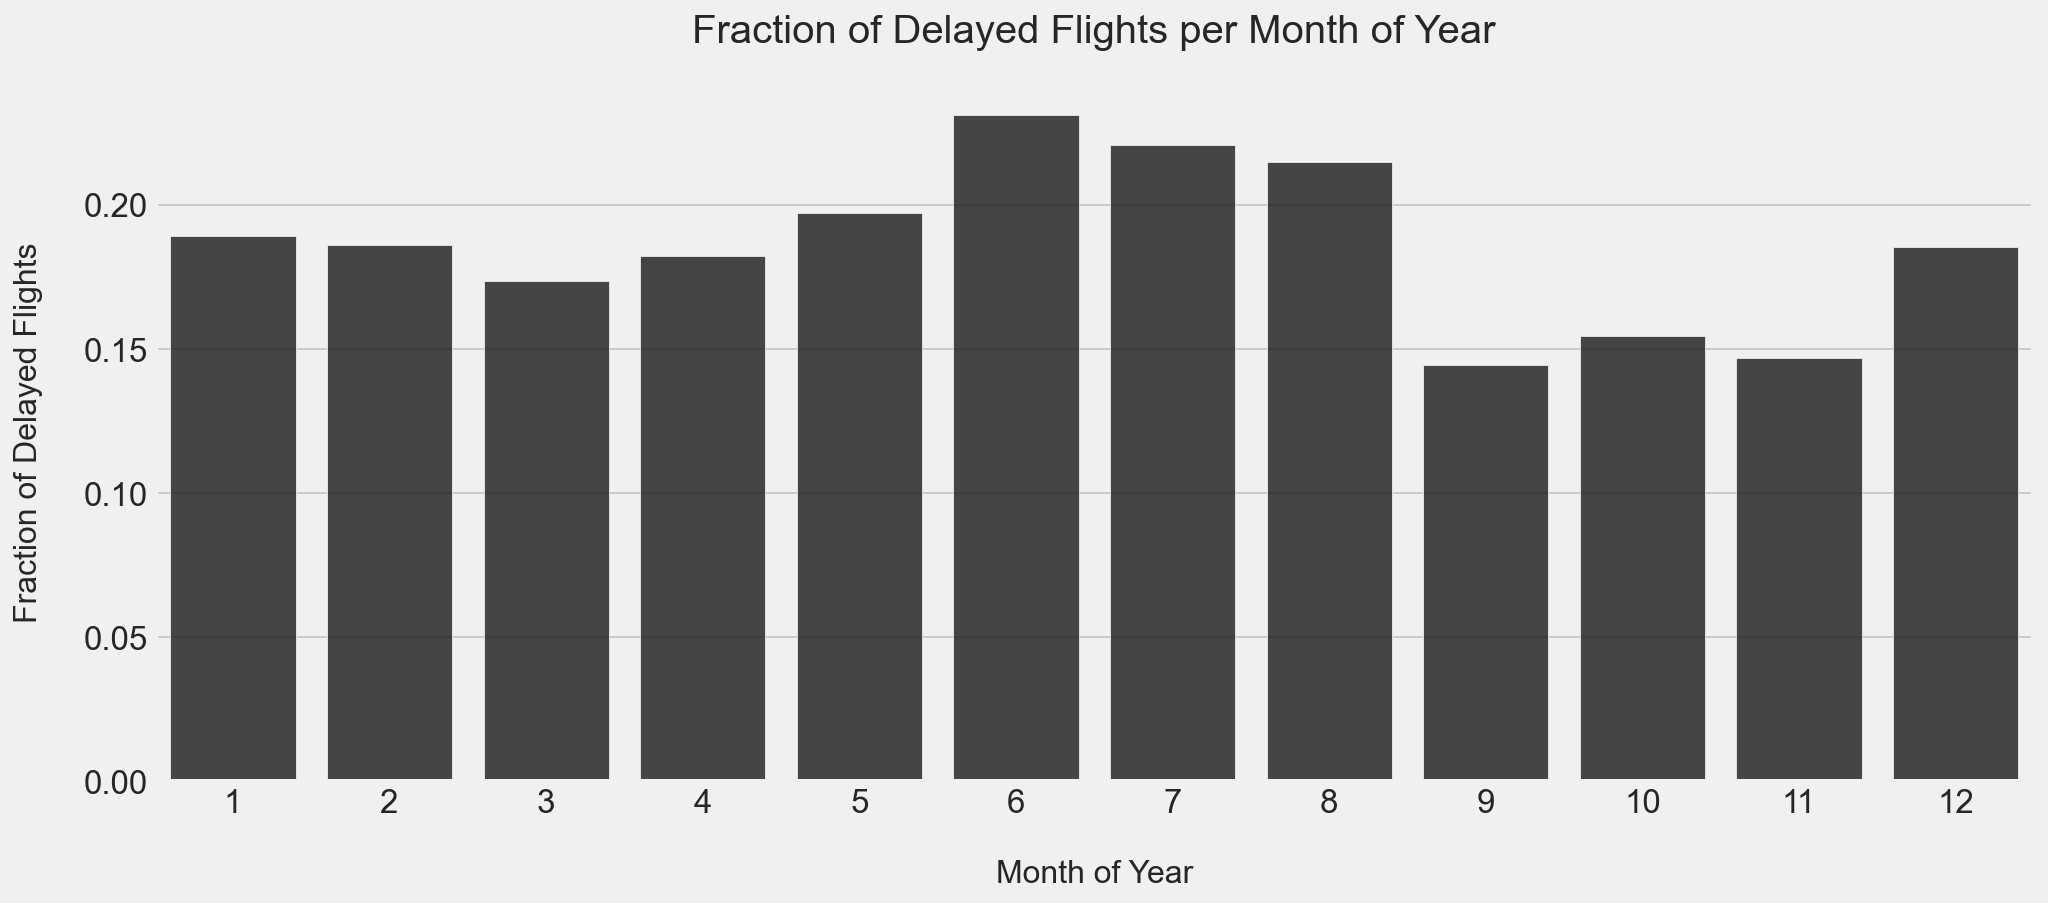

In [13]:
#creating a figure and plotting the fraction of the flights that were delayed in each month of the year
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=np.linspace(1, 12, 12, dtype=int), y=all_features.groupby('month')['dep_15_del'].mean(),
                            color='k', alpha=0.8, ax=ax)
ax.set_xlabel('Month of Year', fontsize=16, labelpad=20)
ax.set_ylabel('Fraction of Delayed Flights', fontsize=16, labelpad=20)
ax.set_title('Fraction of Delayed Flights per Month of Year', fontsize=20, pad=20)
plt.show()

The summer months of June, July and August exhibit the largest proportion of delay, which could be the result of either busier airports due to summer vacations or more extreme weather events caused by the yearly hurricane season both in the Atlantic and the Pacific regions. On the other hand, the winter months of December, January and February demonstrate an average fraction of delayed flights.  

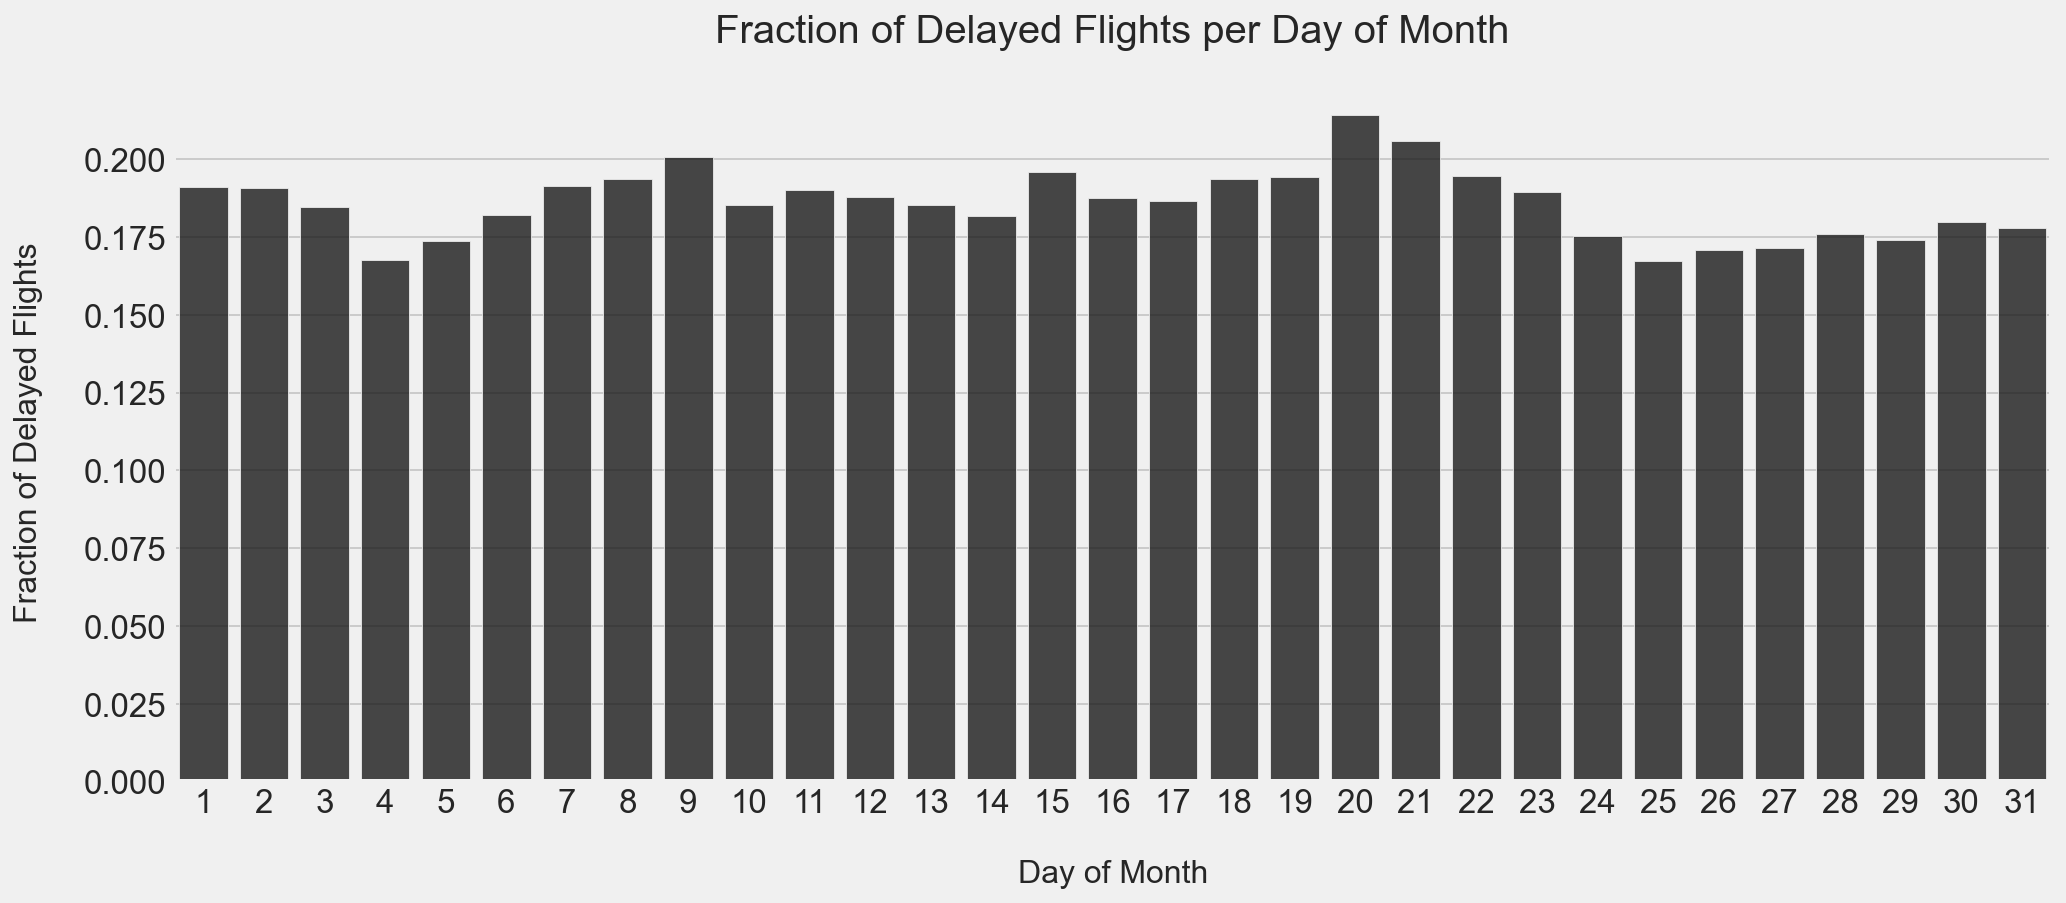

In [14]:
#creating a figure and plotting the fraction of the flights that were delayed in each day of the month
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=np.linspace(1, 31, 31, dtype=int), y=all_features.groupby('day')['dep_15_del'].mean(),
                            color='k', alpha=0.8, ax=ax)
ax.set_xlabel('Day of Month', fontsize=16, labelpad=20)
ax.set_ylabel('Fraction of Delayed Flights', fontsize=16, labelpad=20)
ax.set_title('Fraction of Delayed Flights per Day of Month', fontsize=20, pad=20)
plt.show()

What seems to be noteworthy here is the lower proportion of delays towards the end of the month, which could be the result of less busy airports due to personal finance limitations at the end of the month. However, there doesn't appear to be a meaningful relationship between flight status and scheduled day of month.

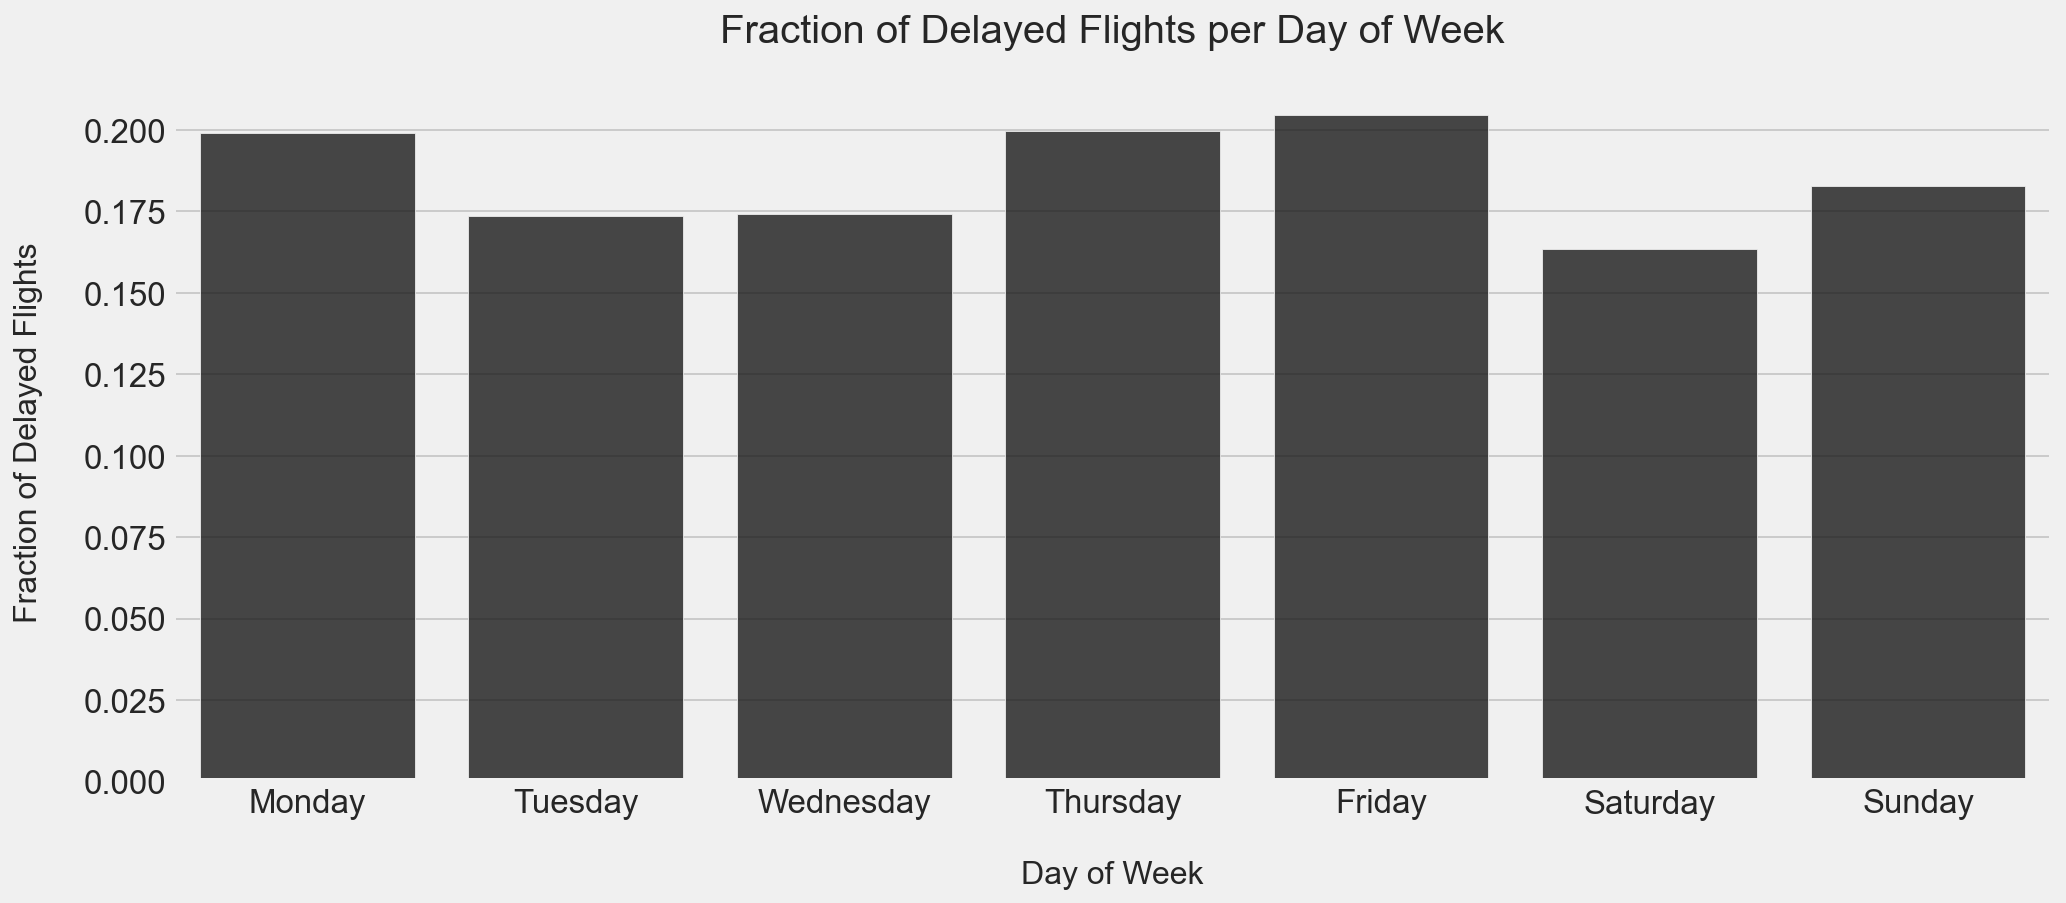

In [15]:
#creating a figure and plotting the fraction of the flights that were delayed in each day of the week
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
            y=all_features.groupby('day_of_week')['dep_15_del'].mean(), color='k', alpha=0.8, ax=ax)
ax.set_xlabel('Day of Week', fontsize=16, labelpad=20)
ax.set_ylabel('Fraction of Delayed Flights', fontsize=16, labelpad=20)
ax.set_title('Fraction of Delayed Flights per Day of Week', fontsize=20, pad=20)
plt.show()

Here we can see higher fractions of delayed flights on Thursdays, Fridays, and Mondays, possibly due to busier airports towards the end and start of the week as people go on weekend breaks quite regularly. Nonetheless, the difference between the days isn't very large.

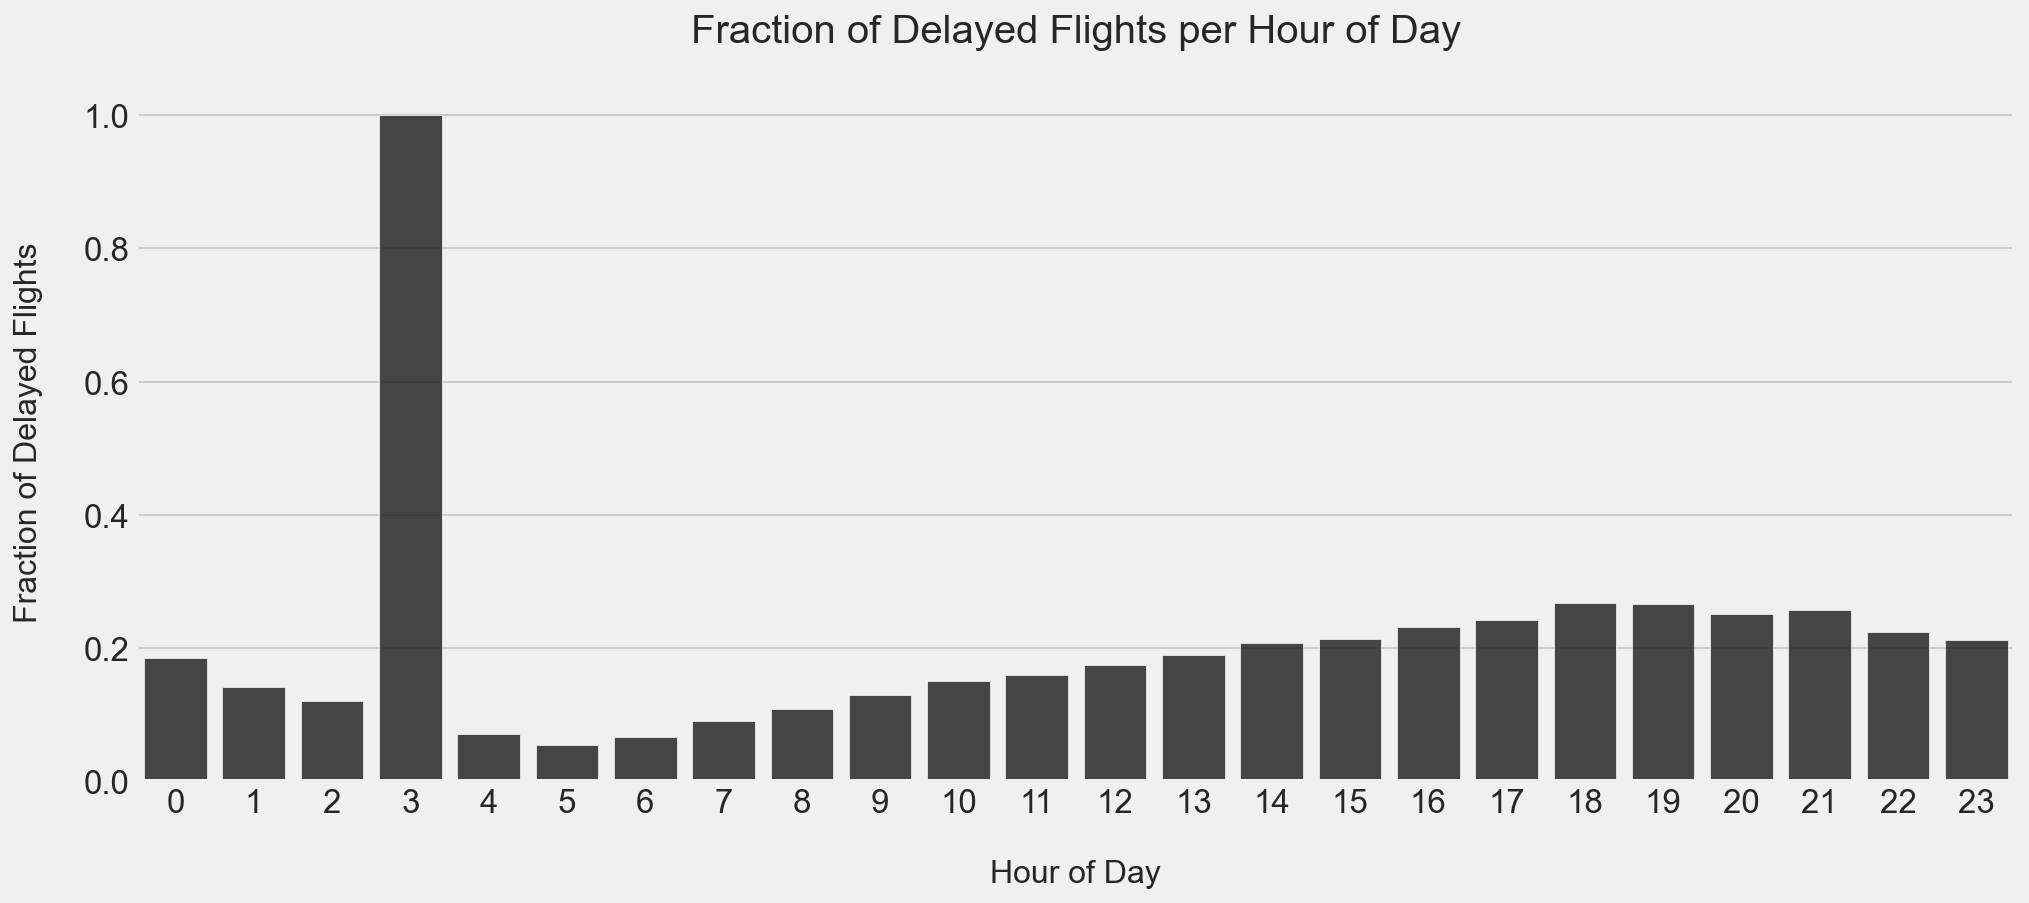

In [16]:
#creating a figure and plotting the fraction of the flights that were delayed in each hour of the day
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=np.linspace(0, 23, 24, dtype=int), y=all_features.groupby('hour')['dep_15_del'].mean(),
                            color='k', alpha=0.8, ax=ax)
ax.set_xlabel('Hour of Day', fontsize=16, labelpad=20)
ax.set_ylabel('Fraction of Delayed Flights', fontsize=16, labelpad=20)
ax.set_title('Fraction of Delayed Flights per Hour of Day', fontsize=20, pad=20)
plt.show()

The 100% chance of delay at hour three is a statitistical anomaly; there are only three flights in the entire data scheduled for this hour and all three have been delayed. Apart from that, we can see a clear pattern emerging during the day, with the number of delayed flights gradually increasing during the day, as airports get busier and delays build up, peaking in early evening, before subsiding once more.

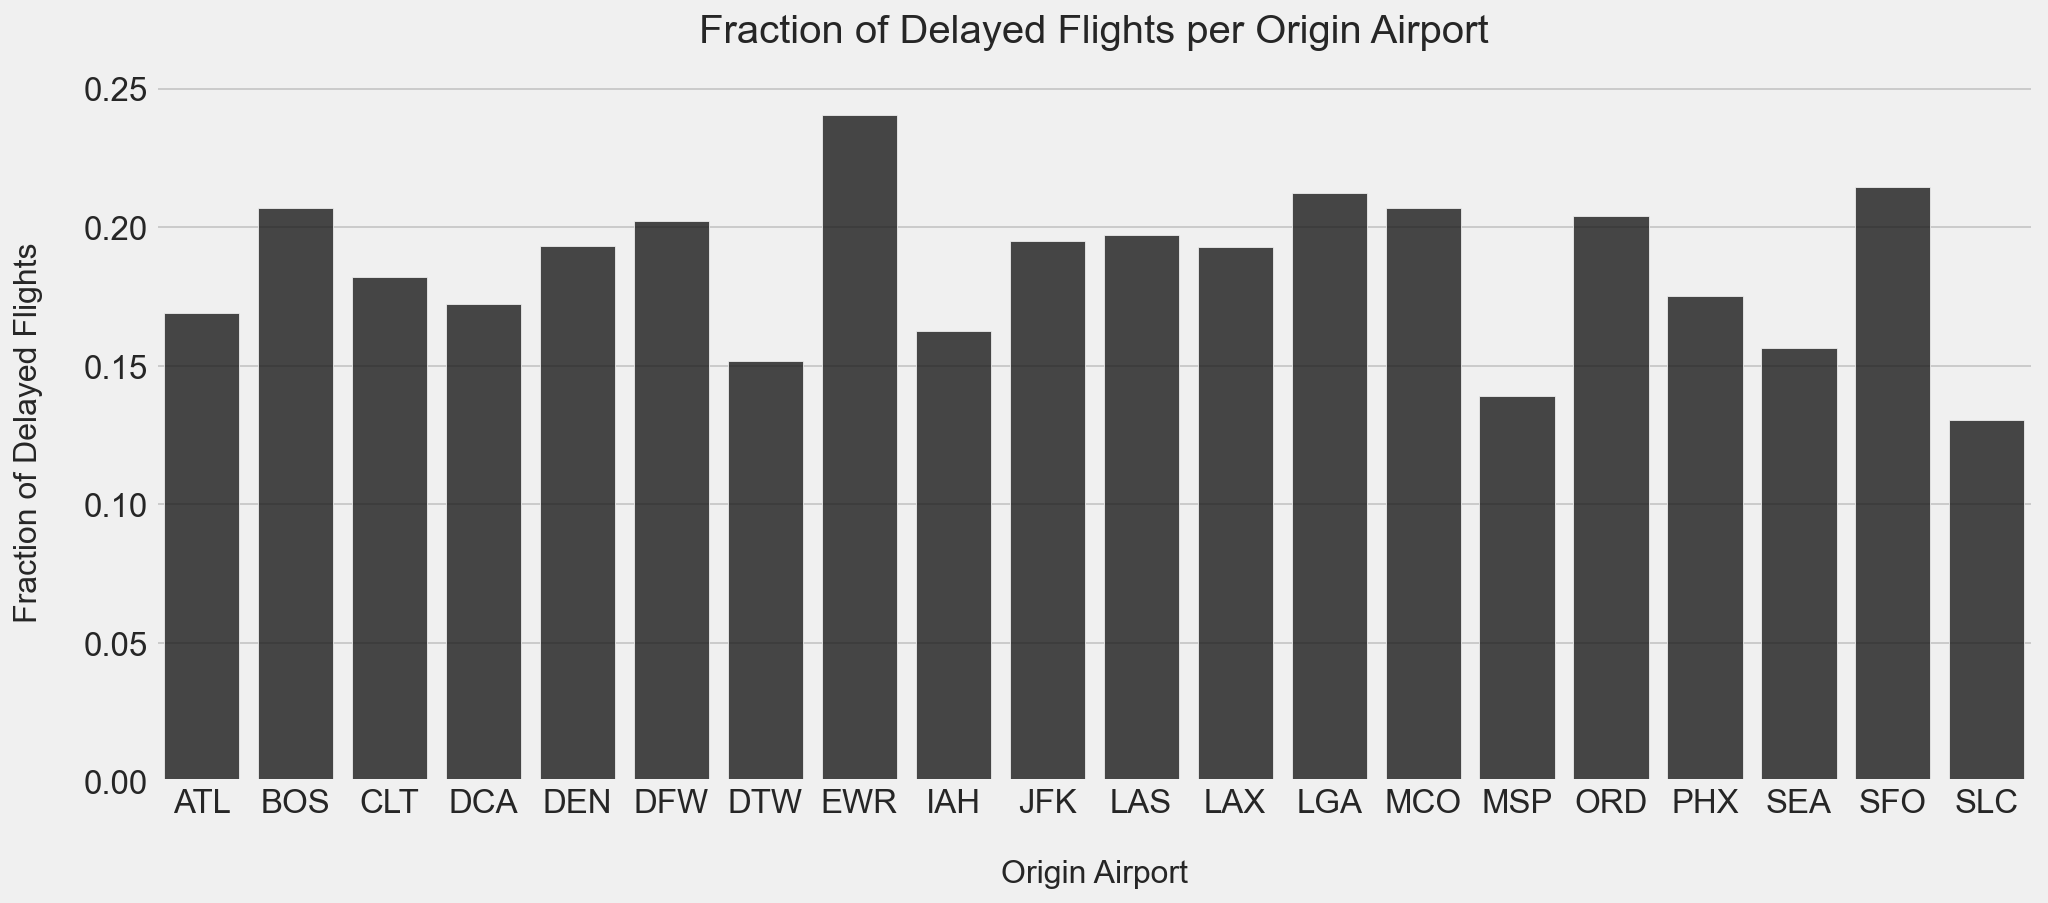

In [17]:
#creating a figure and plotting the fraction of the flights that were delayed in each airport of origin
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=[i for i in list(all_features.groupby('origin').groups.keys())], 
            y=all_features.groupby('origin')['dep_15_del'].mean(), color='k', alpha=0.8, ax=ax)
ax.set_xlabel('Origin Airport', fontsize=16, labelpad=20)
ax.set_ylabel('Fraction of Delayed Flights', fontsize=16, labelpad=20)
ax.set_title('Fraction of Delayed Flights per Origin Airport', fontsize=20, pad=20)
plt.show()

Moving to airport of origin, again no clear pattern exists. Airports belonging to the same regions, such as EWR and JFK, return different numbers despite experiencing similar weather patterns, suggesting other underlying factors are at work. However, we can see once again that the differences between these airports aren't huge.

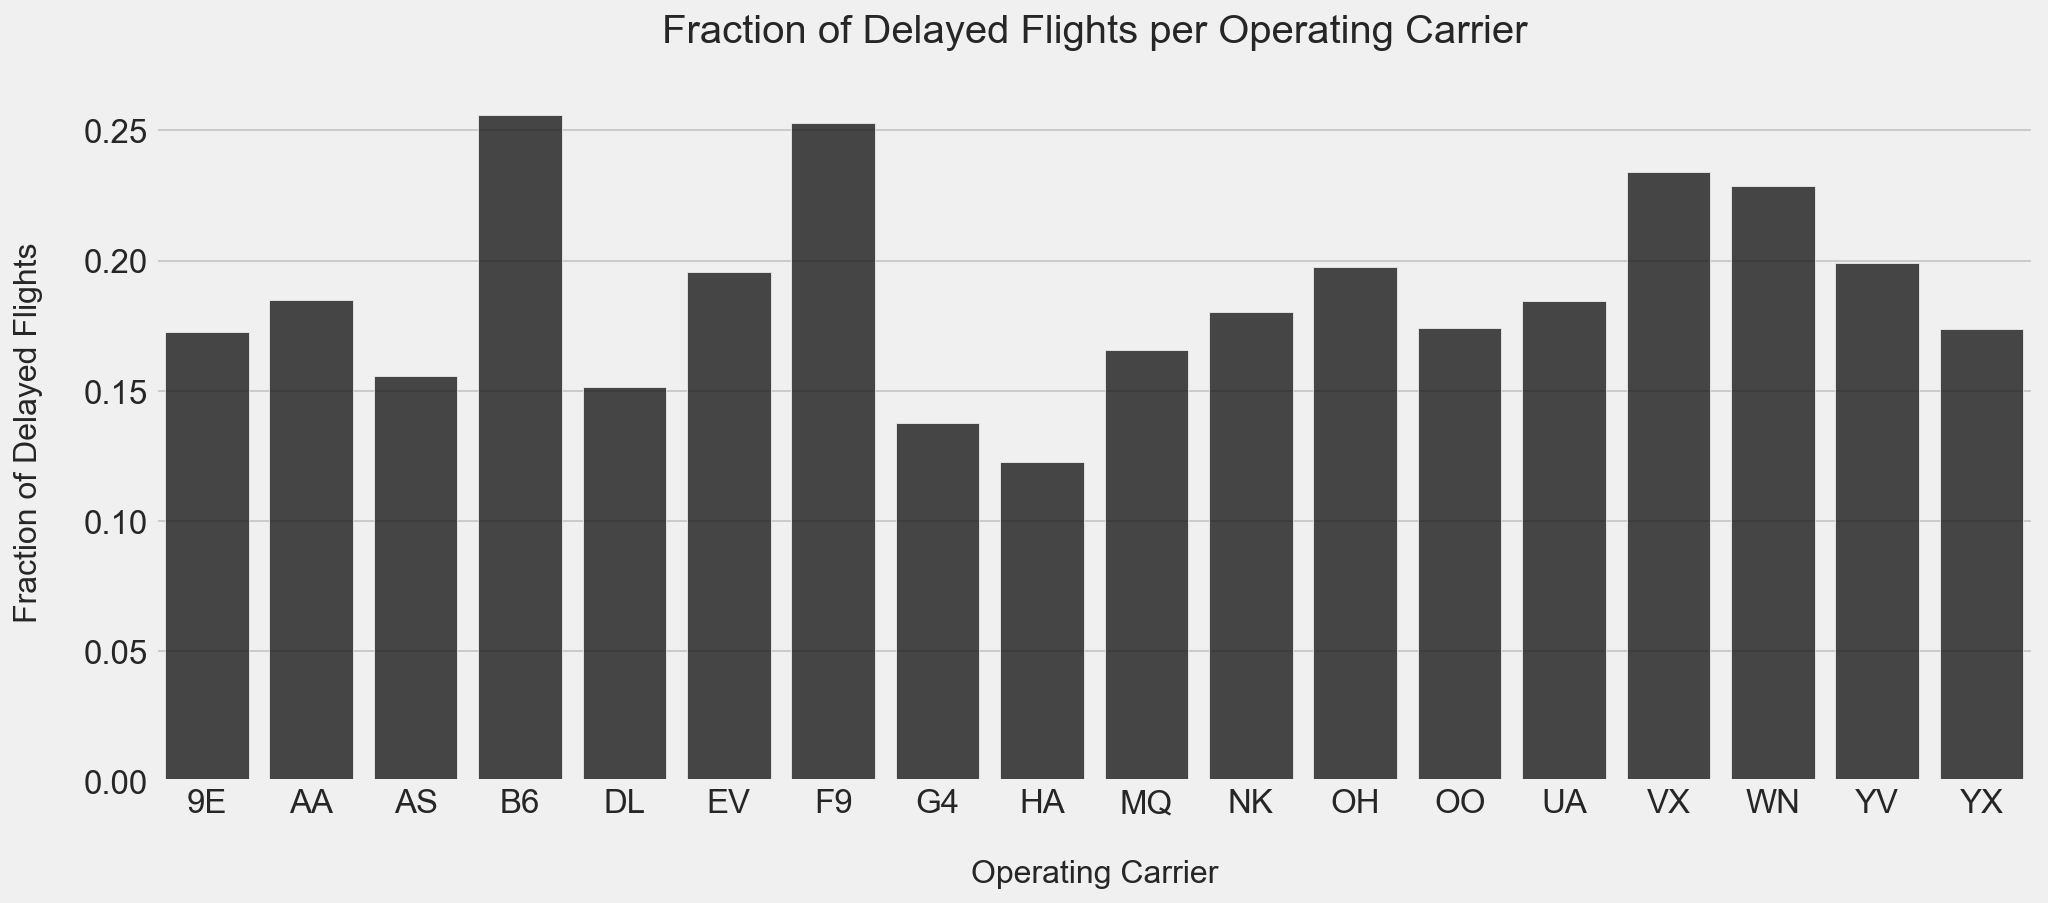

In [18]:
#creating a figure and plotting the fraction of the flights that were delayed for each individual carrier
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=[i for i in list(all_features.groupby('carrier').groups.keys())], 
            y=all_features.groupby('carrier')['dep_15_del'].mean(), color='k', alpha=0.8, ax=ax)
ax.set_xlabel('Operating Carrier', fontsize=16, labelpad=20)
ax.set_ylabel('Fraction of Delayed Flights', fontsize=16, labelpad=20)
ax.set_title('Fraction of Delayed Flights per Operating Carrier', fontsize=20, pad=20)
plt.show()

The two worst performing carriers are low-cost airlines, while VX is the largest operator of domestic flights in the United States.

Looking at the above graphs, it is quite clear that there's no great relationship between flight status and the various flight features explored, save the scheduled hour of the flight and perhaps the operating airline.

#### Weather Feature Analysis

The available weather data consists of different features, including a categorical description of condition, amount of liquid precipitation in millimeters, wind speed in meters per second, wind direction encoded in eight different categories, air temperature and so on.

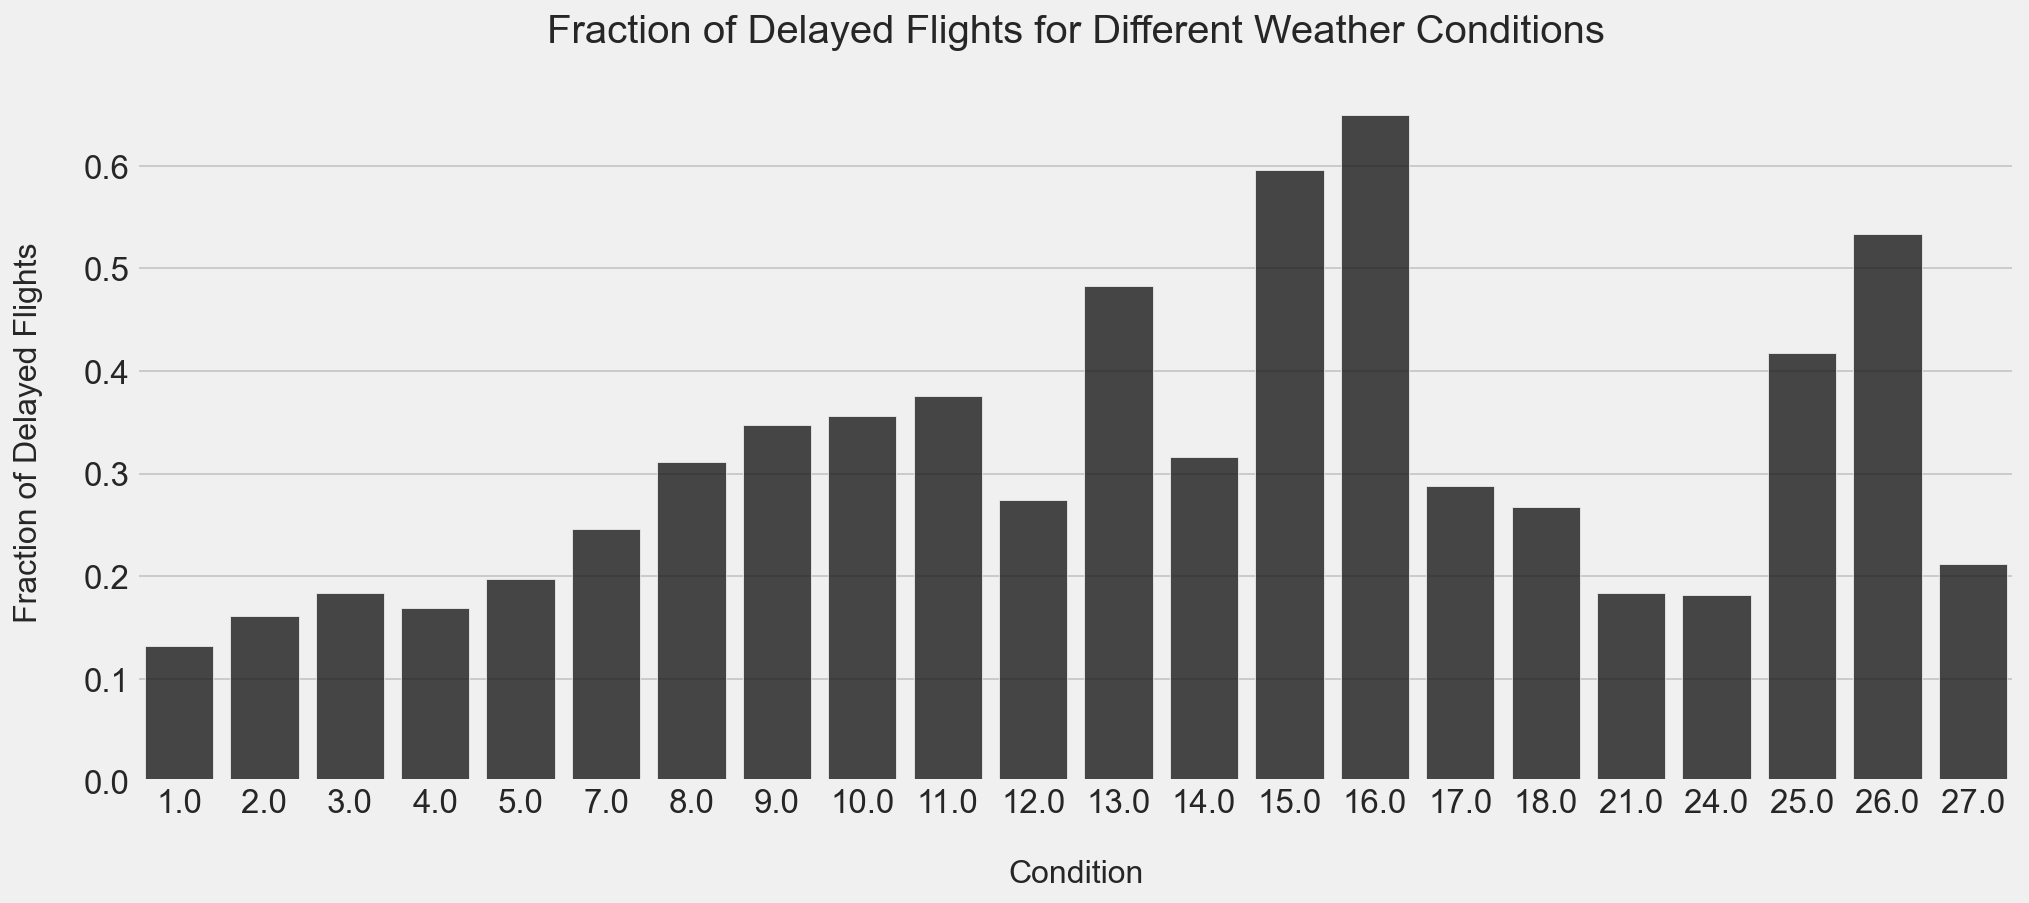

In [19]:
#creating a figure and plotting the fraction of the flights that were delayed for each weather condition
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=[i for i in list(all_features.groupby('condition').groups.keys())], 
            y=all_features.groupby('condition')['dep_15_del'].mean(), color='k',
                            alpha=0.8, ax=ax)
ax.set_xlabel('Condition', fontsize=16, labelpad=20)
ax.set_ylabel('Fraction of Delayed Flights', fontsize=16, labelpad=20)
ax.set_title('Fraction of Delayed Flights for Different Weather Conditions',
                     fontsize=20, pad=20)
plt.show()

As one might expect, there is a noticeable correlation between weather conditions and probability of delay. It is at its highest when there is snowfall (15, 16) or thunderstorms (25, 26), while the chance of delay due to heavy rain (7, 8) is about average.

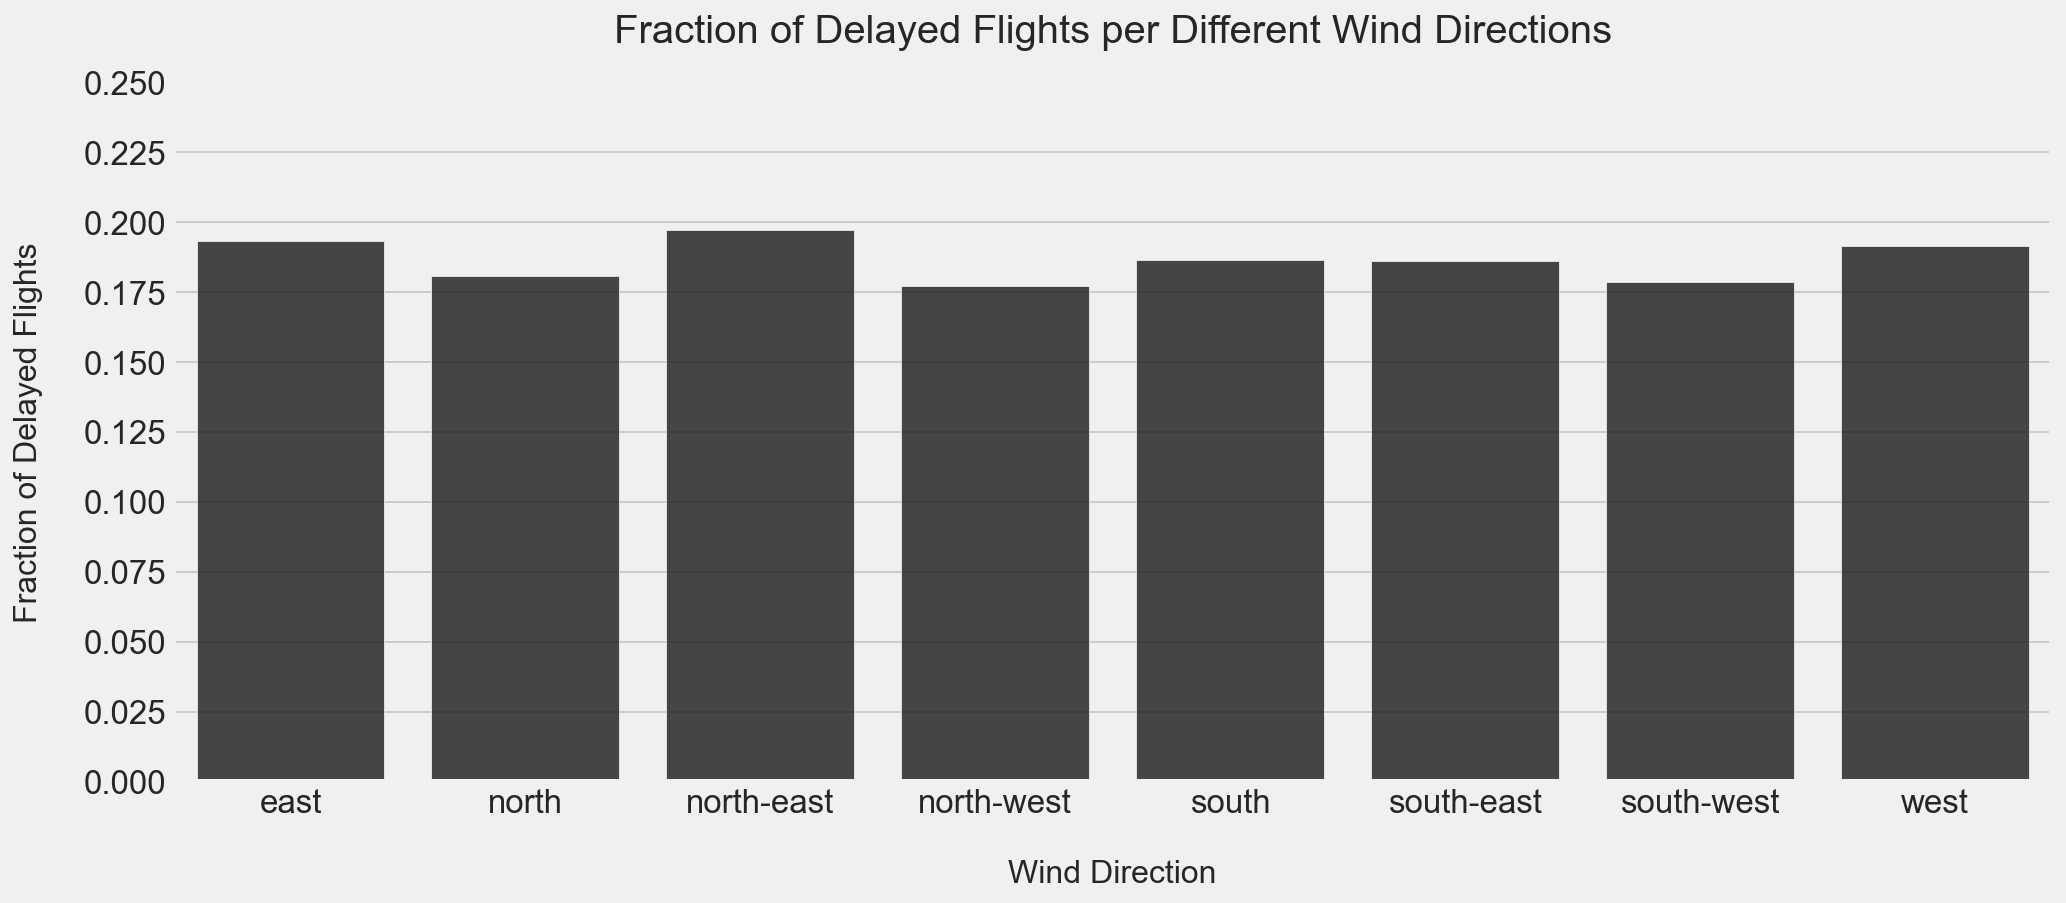

In [20]:
#creating a figure and plotting the fraction of the flights that were delayed for each category of wind direction
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=[i for i in list(all_features.groupby('wind_direction').groups.keys())], 
            y=all_features.groupby('wind_direction')['dep_15_del'].mean(), color='k',
                            alpha=0.8, ax=ax)
ax.set_xlabel('Wind Direction', fontsize=16, labelpad=20)
ax.set_ylabel('Fraction of Delayed Flights', fontsize=16, labelpad=20)
ax.set_title('Fraction of Delayed Flights per Different Wind Directions',
             fontsize=20, pad=20)
ax.set_yticks(np.linspace(0, 0.25, 11))
plt.show()

When considered monolithically, wind direction doesn't appear to have much influence over flight status. But given large geographical variations between origin airports and weather patterns which take on a continental scale given the size of the country, it would be wise to look at the effect of wind direction at each individual airport. Here, I will only consider JFK and SEA.

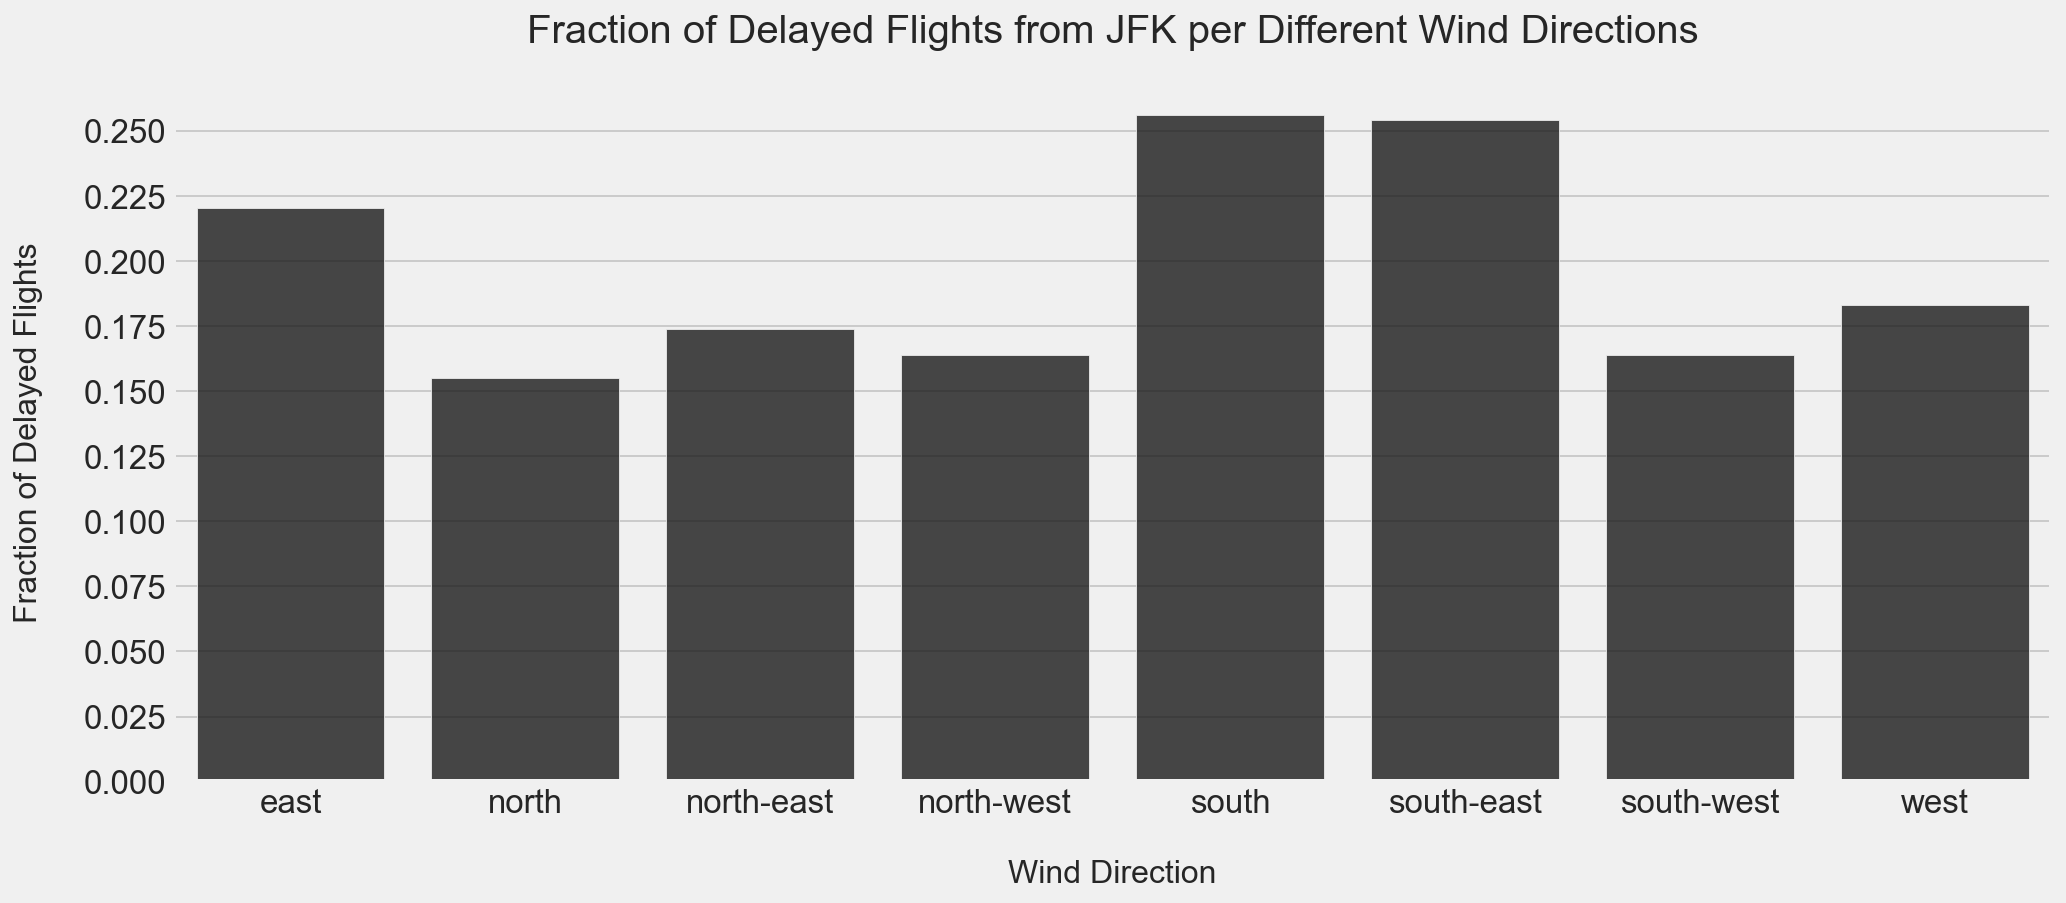

In [21]:
#creating a figure and plotting the fraction of the flights that were delayed for each category of wind direction
#at JFK
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=[i for i in list(all_features.groupby('wind_direction').groups.keys())], 
            y=all_features[all_features['origin'] == 'JFK'].groupby('wind_direction')\
                    ['dep_15_del'].mean(), color='k',
                            alpha=0.8, ax=ax)
ax.set_xlabel('Wind Direction', fontsize=16, labelpad=20)
ax.set_ylabel('Fraction of Delayed Flights', fontsize=16, labelpad=20)
ax.set_title('Fraction of Delayed Flights from JFK per Different Wind Directions',
                     fontsize=20, pad=20)
ax.set_yticks(np.linspace(0, 0.25, 11))
plt.show()

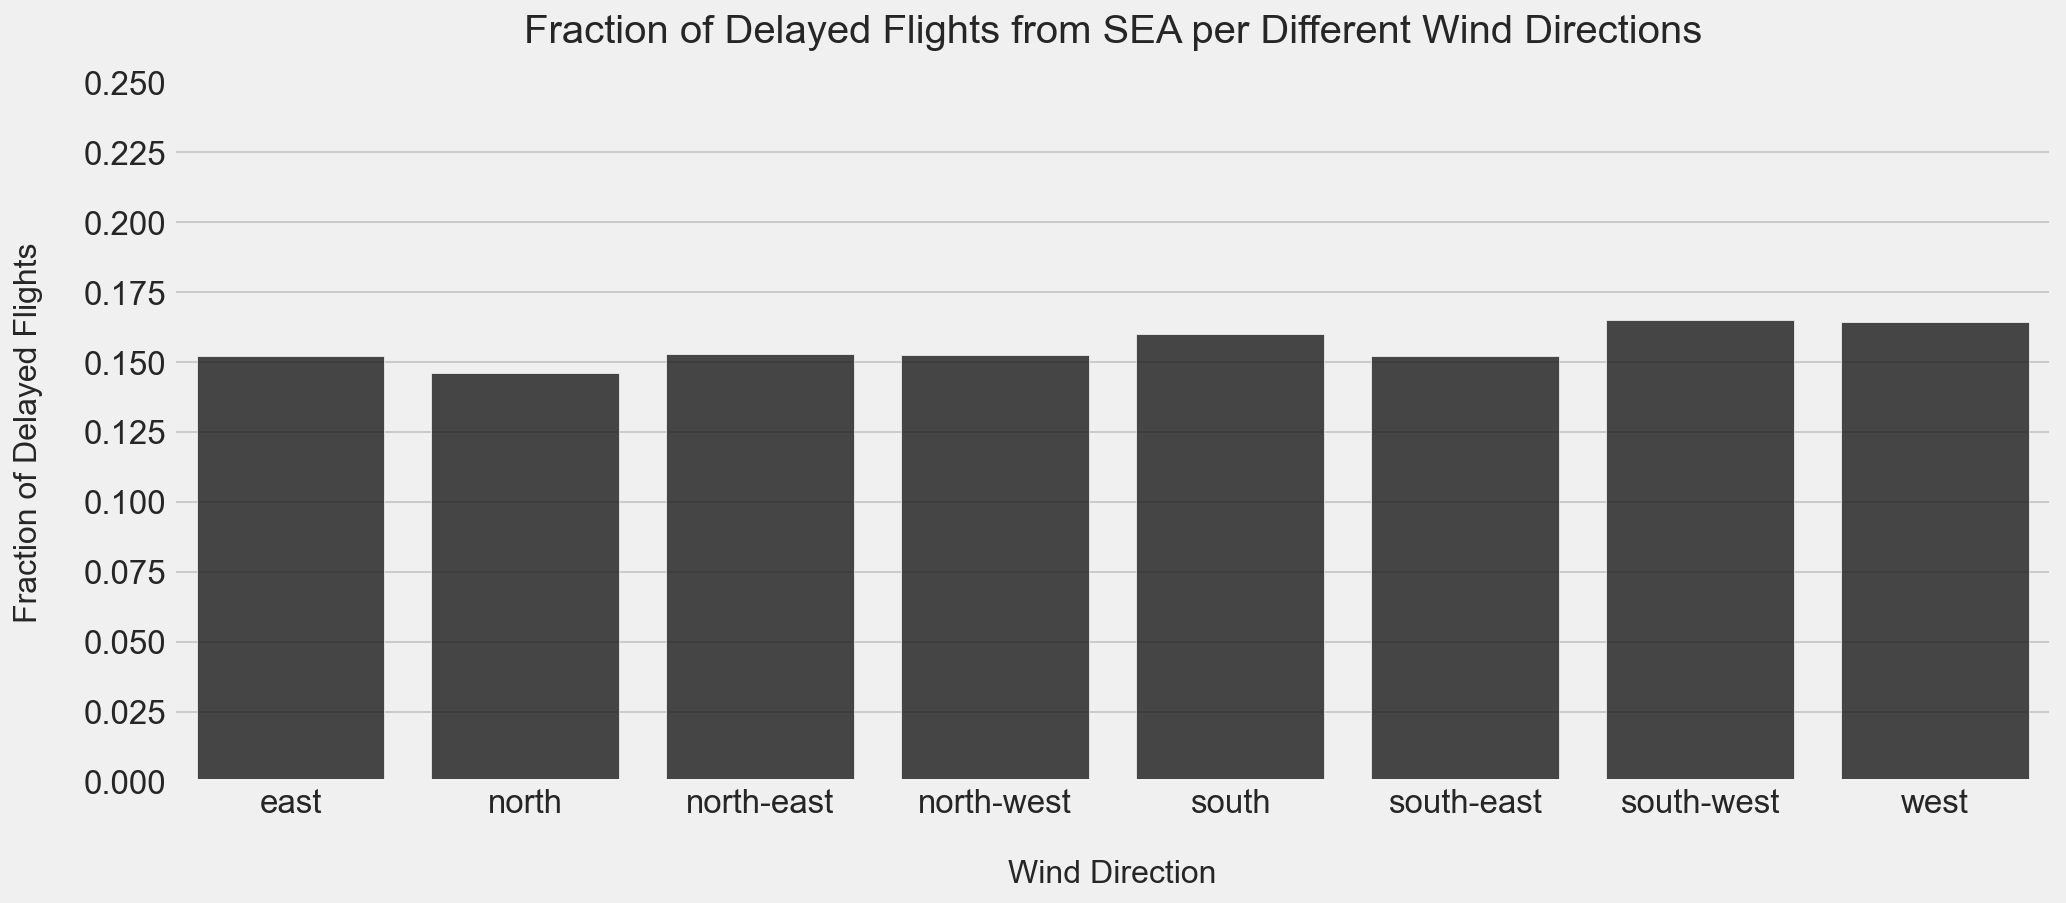

In [22]:
#creating a figure and plotting the fraction of the flights that were delayed for each category of wind direction
#at SEA
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=[i for i in list(all_features.groupby('wind_direction').groups.keys())], 
            y=all_features[all_features['origin'] == 'SEA'].groupby('wind_direction')\
                    ['dep_15_del'].mean(), color='k',
                            alpha=0.8, ax=ax)
ax.set_xlabel('Wind Direction', fontsize=16, labelpad=20)
ax.set_ylabel('Fraction of Delayed Flights', fontsize=16, labelpad=20)
ax.set_title('Fraction of Delayed Flights from SEA per Different Wind Directions',
                     fontsize=20, pad=20)
ax.set_yticks(np.linspace(0, 0.25, 11))
plt.show()

As can be seen from the two previous graphs, there's a strong regional element to how wind direction influences flight status. Given this, it would be beneficial to consider the interactions between individual airports and wind direction at modelling stage.

Next, I will quickly look at the distribution of each weather feature.

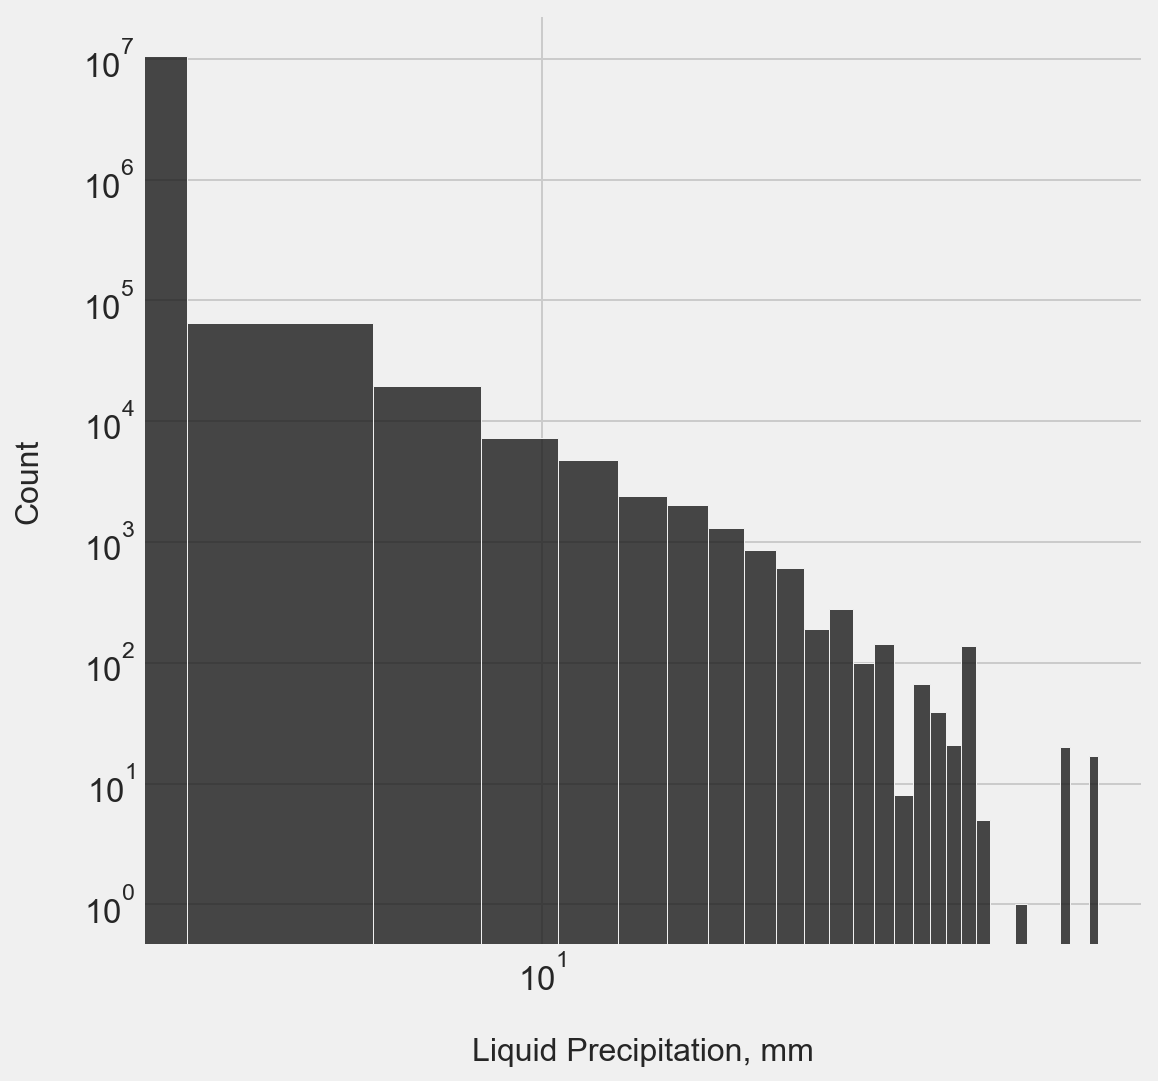

In [23]:
#creating a figure and plotting the distribution of liquid precipitation on a log-log scale
fig, ax = plt.subplots(figsize=(8, 8))
sns.histplot(x=all_features['precipitation'], bins=30, color='k',
                         alpha=0.8, ax=ax)
ax.set_xlabel('Liquid Precipitation, mm', fontsize=16, labelpad=20)
ax.set_ylabel('Count', fontsize=16, labelpad=20)
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

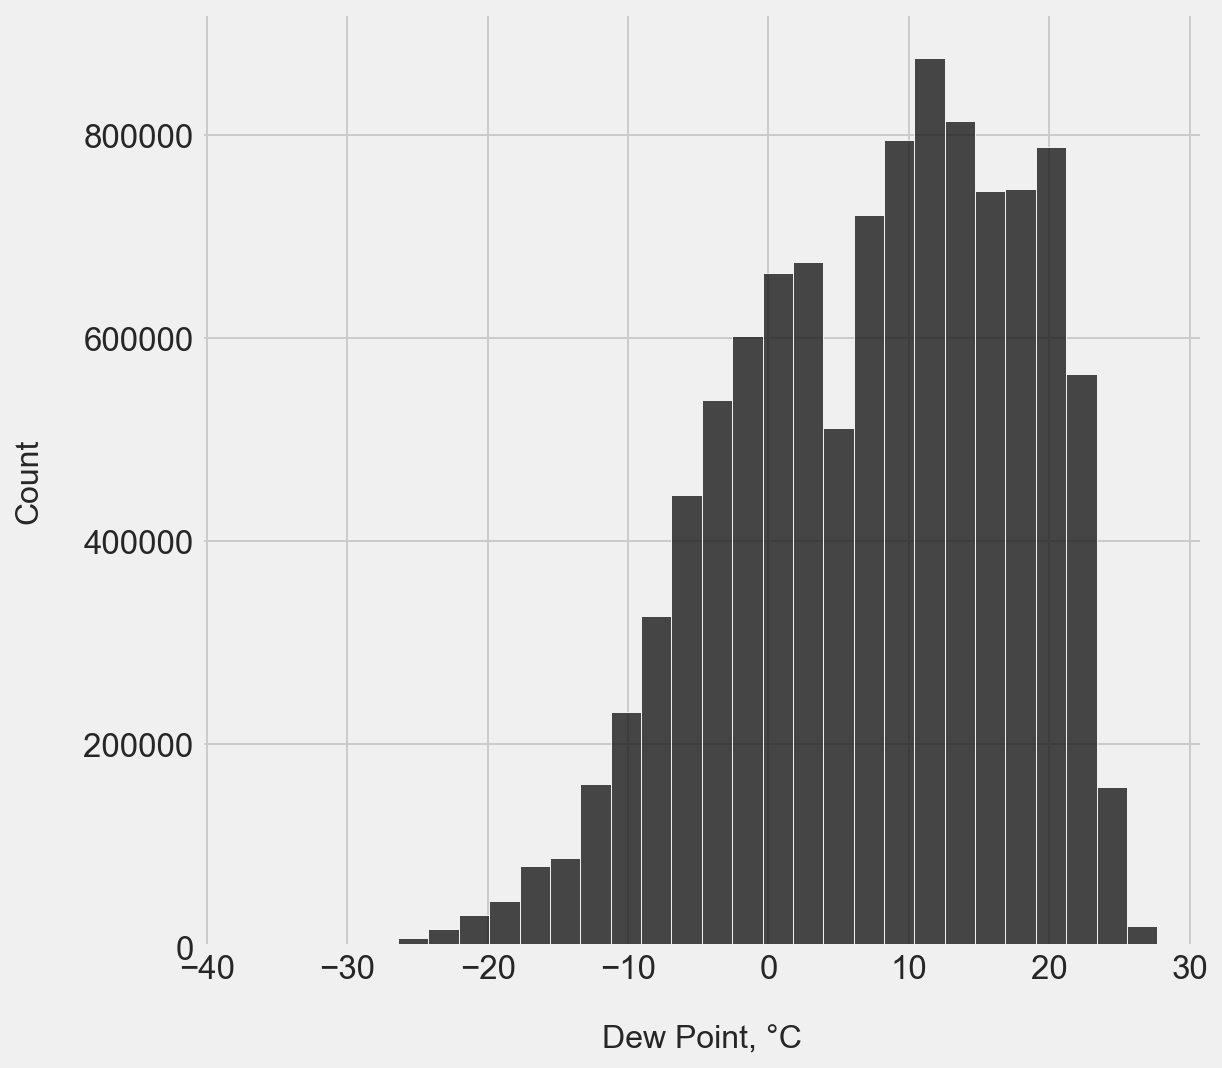

In [24]:
#creating a figure and plotting the distribution of dew point temperature
fig, ax = plt.subplots(figsize=(8, 8))
sns.histplot(x=all_features['dew_temp'], bins=30, color='k',
                         alpha=0.8, ax=ax)
ax.set_xlabel('Dew Point, \N{DEGREE SIGN}C', fontsize=16, labelpad=20)
ax.set_ylabel('Count', fontsize=16, labelpad=20)
plt.show()

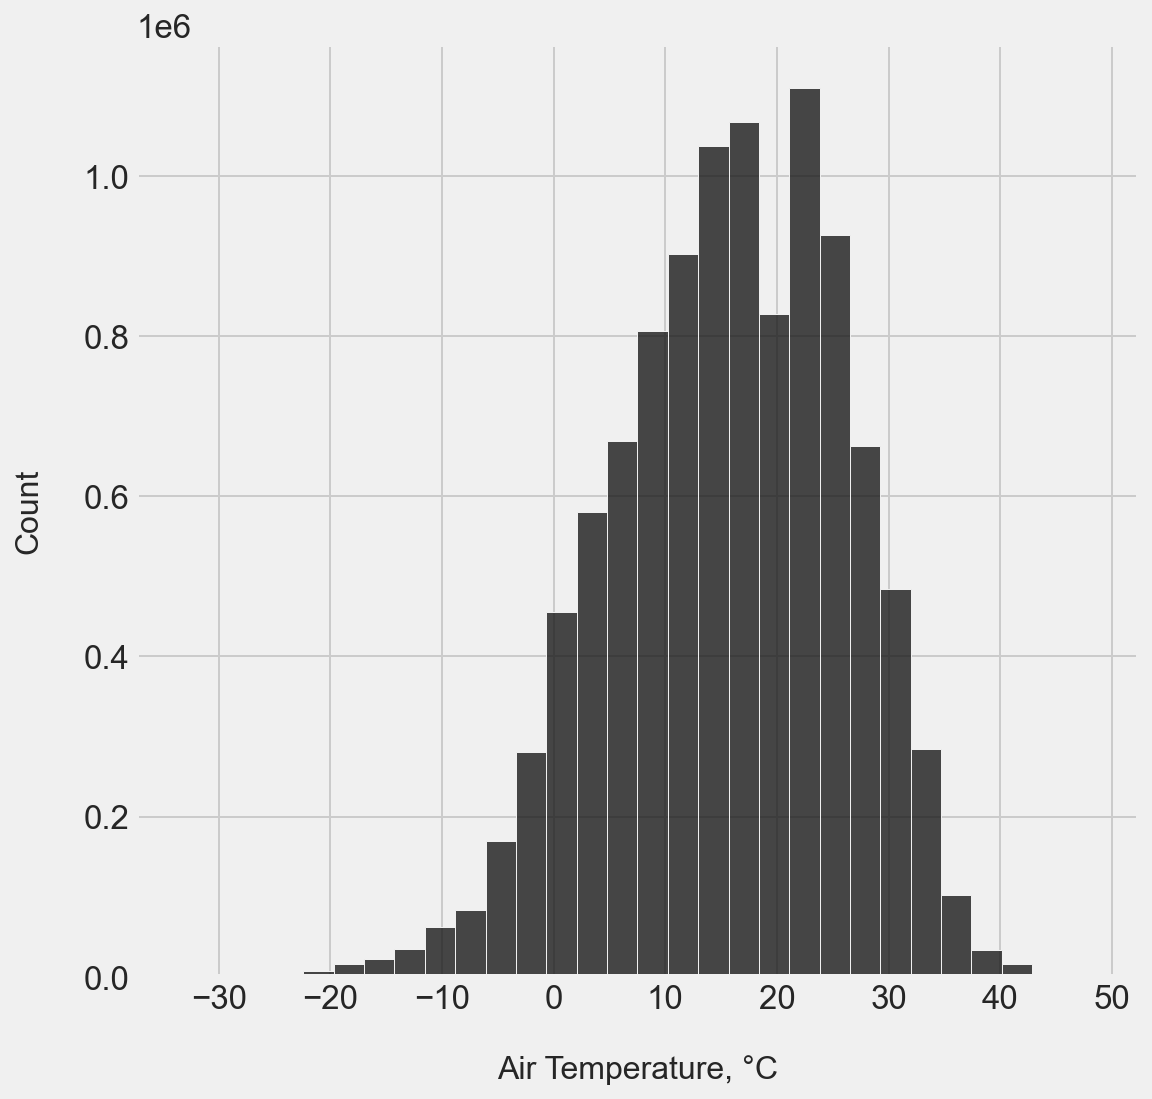

In [25]:
#creating a figure and plotting the distribution of air temperature
fig, ax = plt.subplots(figsize=(8, 8))
sns.histplot(x=all_features['air_temp'], bins=30, color='k',
                         alpha=0.8, ax=ax)
ax.set_xlabel('Air Temperature, \N{DEGREE SIGN}C', fontsize=16, labelpad=20)
ax.set_ylabel('Count', fontsize=16, labelpad=20)
plt.show()

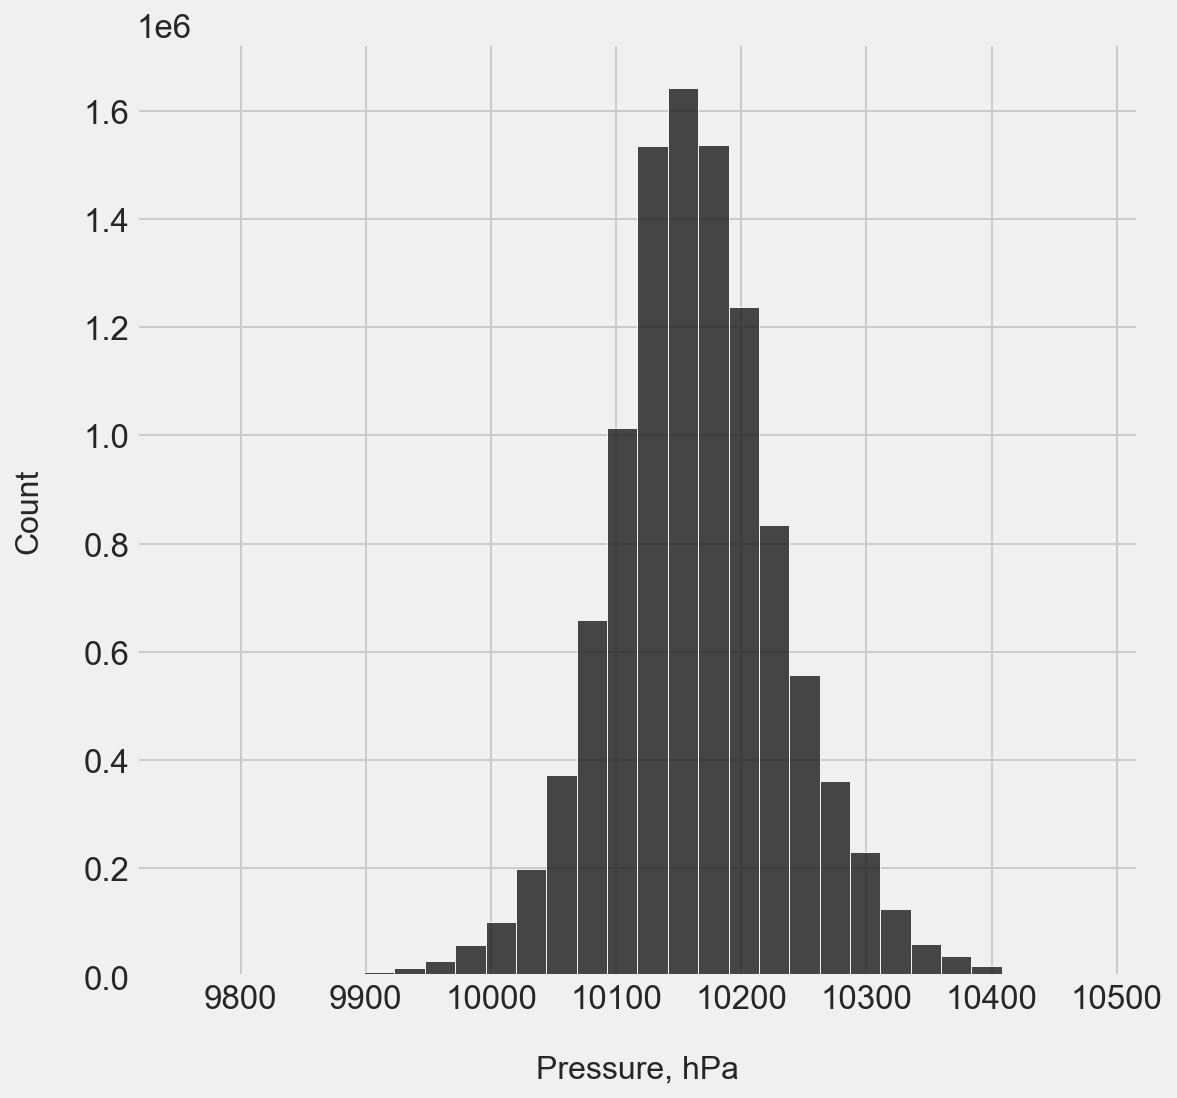

In [26]:
#creating a figure and plotting the distribution of pressure
fig, ax = plt.subplots(figsize=(8, 8))
sns.histplot(x=all_features['pressure'], bins=30, color='k',
                         alpha=0.8, ax=ax)
ax.set_xlabel('Pressure, hPa', fontsize=16, labelpad=20)
ax.set_ylabel('Count', fontsize=16, labelpad=20)
plt.show()

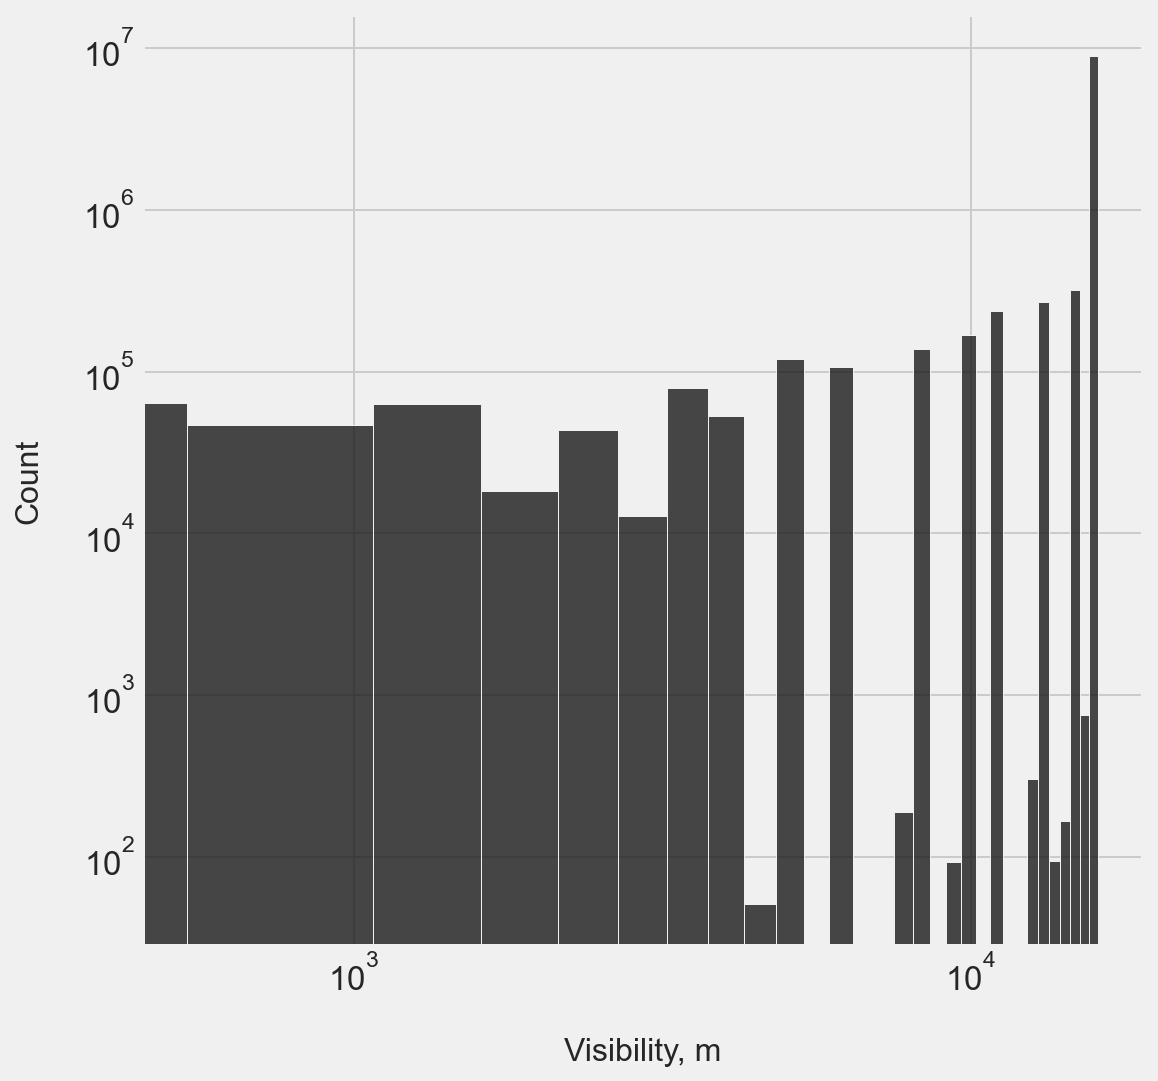

In [27]:
#creating a figure and plotting the distribution of visibility on a log-log scale
fig, ax = plt.subplots(figsize=(8, 8))
sns.histplot(x=all_features['visibility'], bins=30, color='k',
                         alpha=0.8, ax=ax)
ax.set_xlabel('Visibility, m', fontsize=16, labelpad=20)
ax.set_ylabel('Count', fontsize=16, labelpad=20)
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

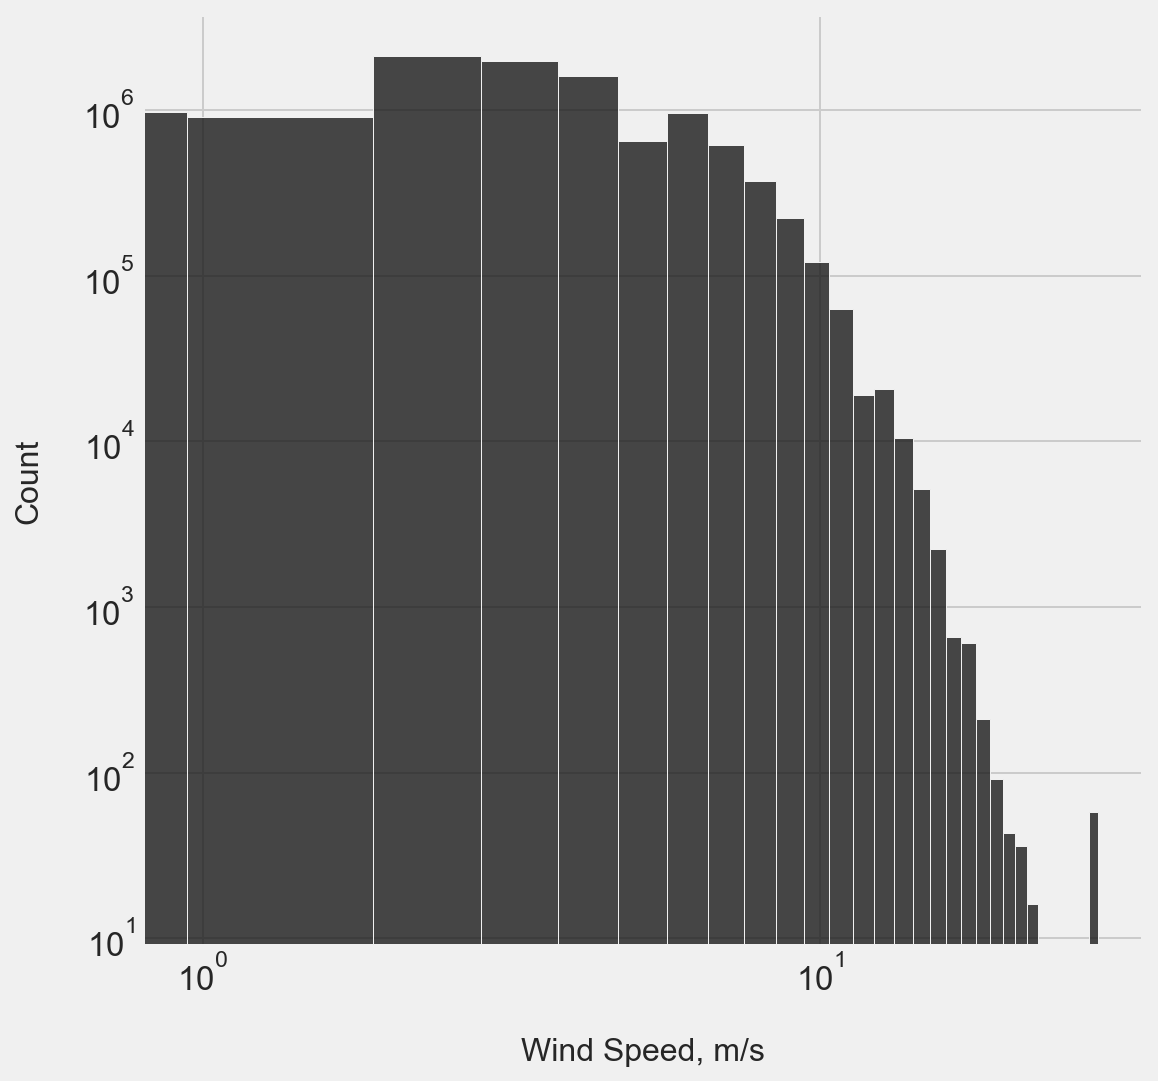

In [28]:
#creating a figure and plotting the distribution of wind speed on a log-log scale
fig, ax = plt.subplots(figsize=(8, 8))
sns.histplot(x=all_features['wind_speed'], bins=30, color='k',
                         alpha=0.8, ax=ax)
ax.set_xlabel('Wind Speed, m/s', fontsize=16, labelpad=20)
ax.set_ylabel('Count', fontsize=16, labelpad=20)
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

Now let us look at the distribution of these features for different labels. This would give us a better understanding of how separate the two labels are when it comes to the underlying weather patterns.

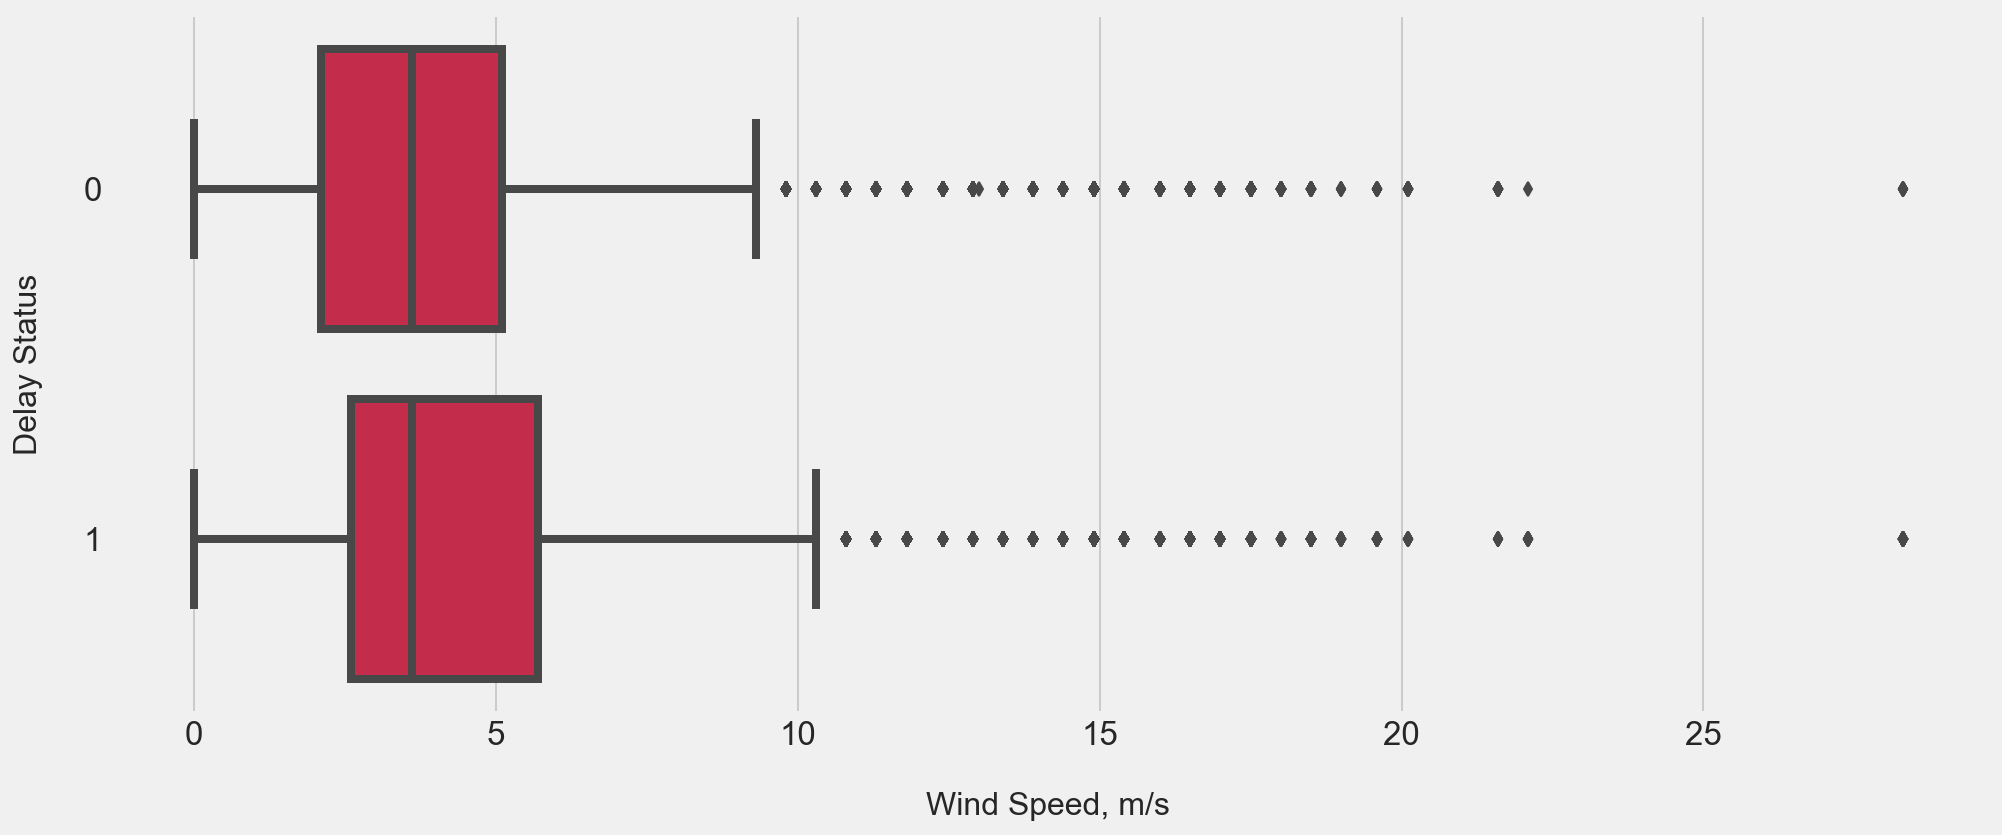

In [29]:
#creating a figure and plotting the distribution of wind speed for the different labels
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(x=all_features['wind_speed'], y=all_features['dep_15_del'],
                    color='crimson', orient='h', ax=ax)
ax.set_xlabel('Wind Speed, m/s', fontsize=16, labelpad=20)
ax.set_ylabel('Delay Status', fontsize=16, labelpad=20)
plt.show()

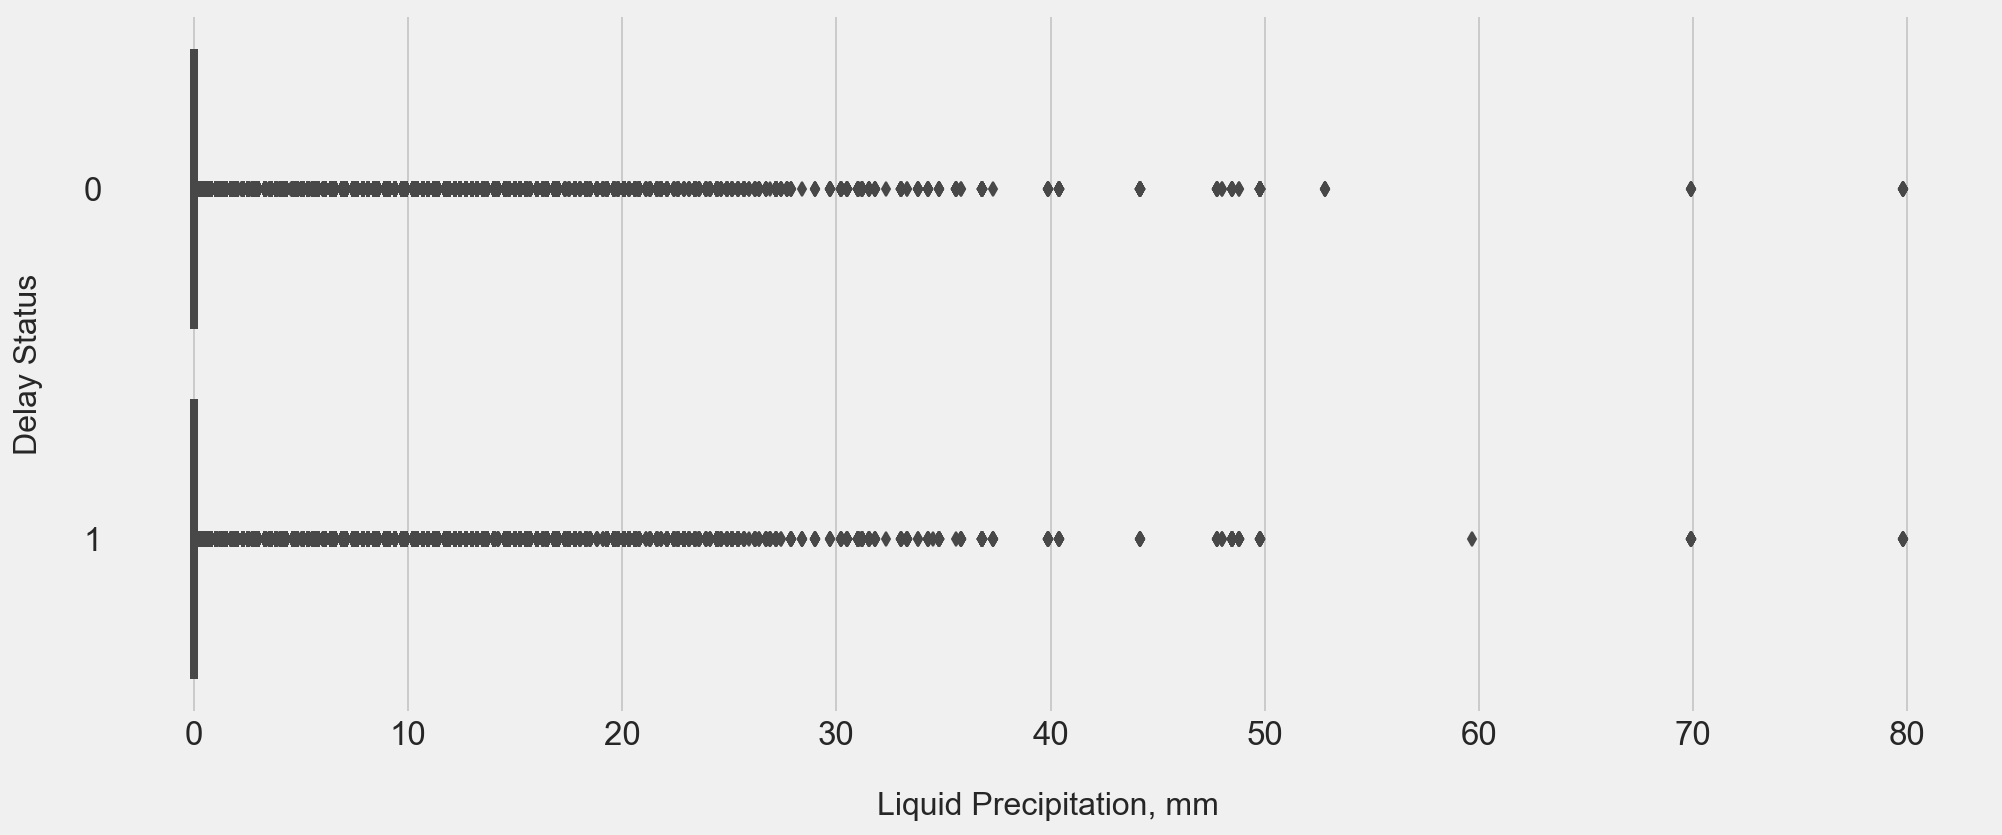

In [30]:
#creating a figure and plotting the distribution of liquid precipitation for the different labels
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(x=all_features['precipitation'], y=all_features['dep_15_del'],
                    color='crimson', orient='h', ax=ax)
ax.set_xlabel('Liquid Precipitation, mm', fontsize=16, labelpad=20)
ax.set_ylabel('Delay Status', fontsize=16, labelpad=20)
plt.show()

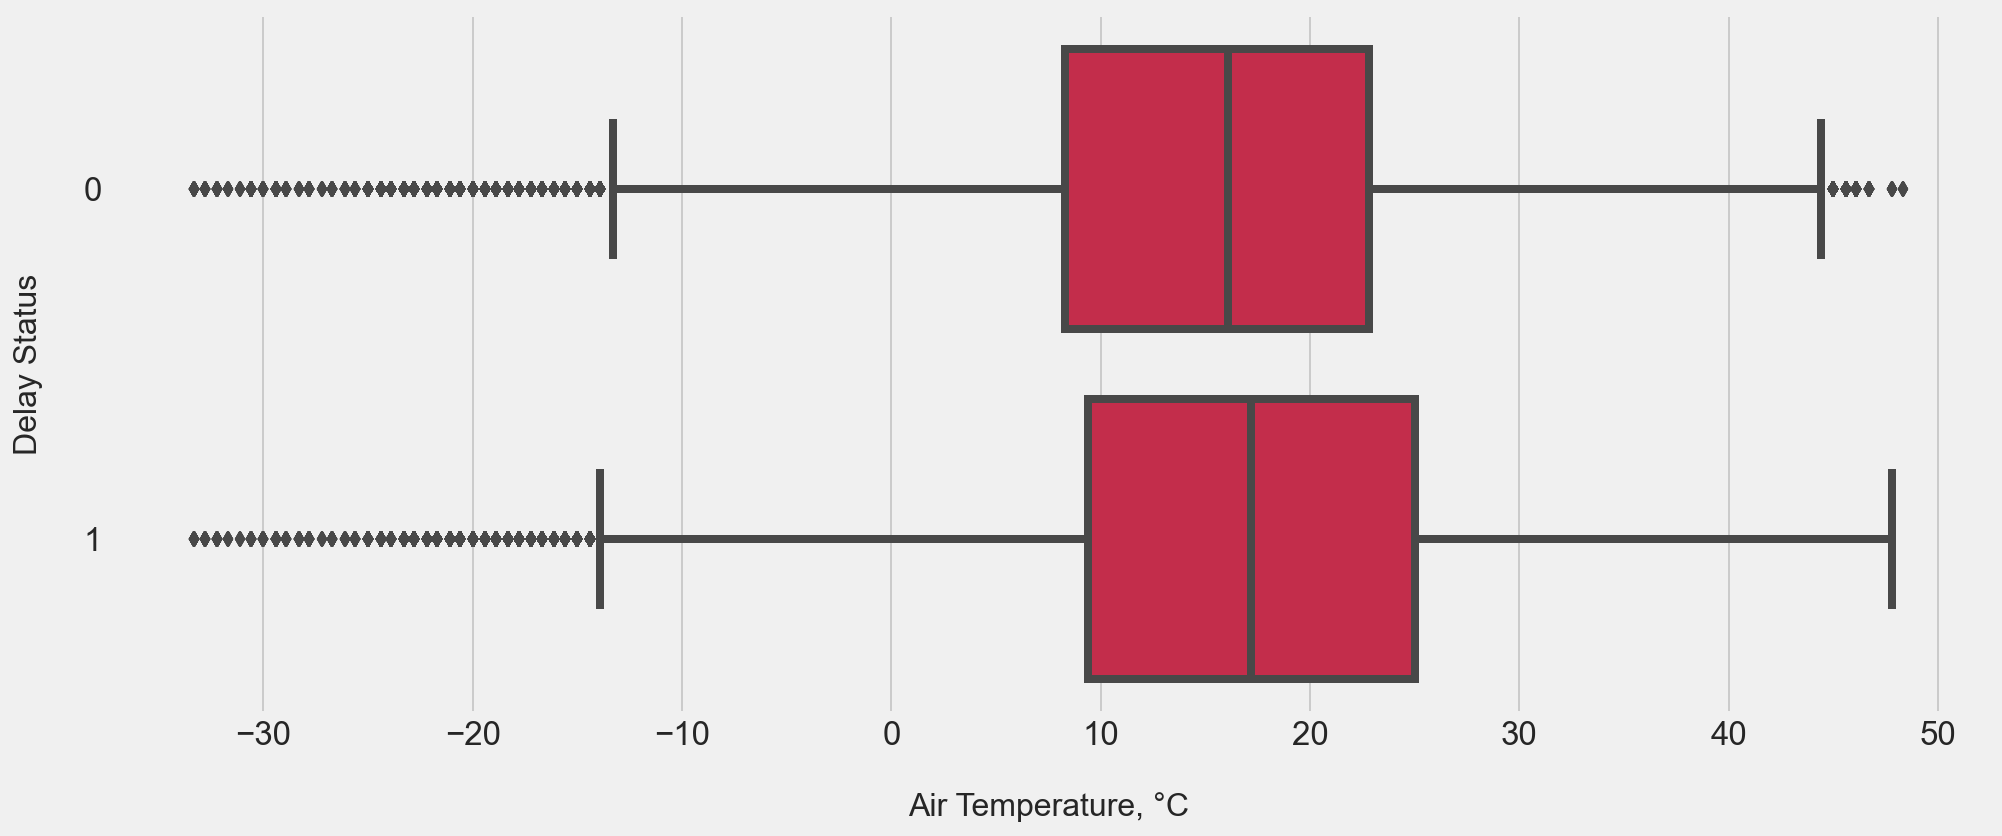

In [31]:
#creating a figure and plotting the distribution of air temperature for the different labels
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(x=all_features['air_temp'], y=all_features['dep_15_del'],
                    color='crimson', orient='h', ax=ax)
ax.set_xlabel('Air Temperature, \N{DEGREE SIGN}C', fontsize=16, labelpad=20)
ax.set_ylabel('Delay Status', fontsize=16, labelpad=20)
plt.show()

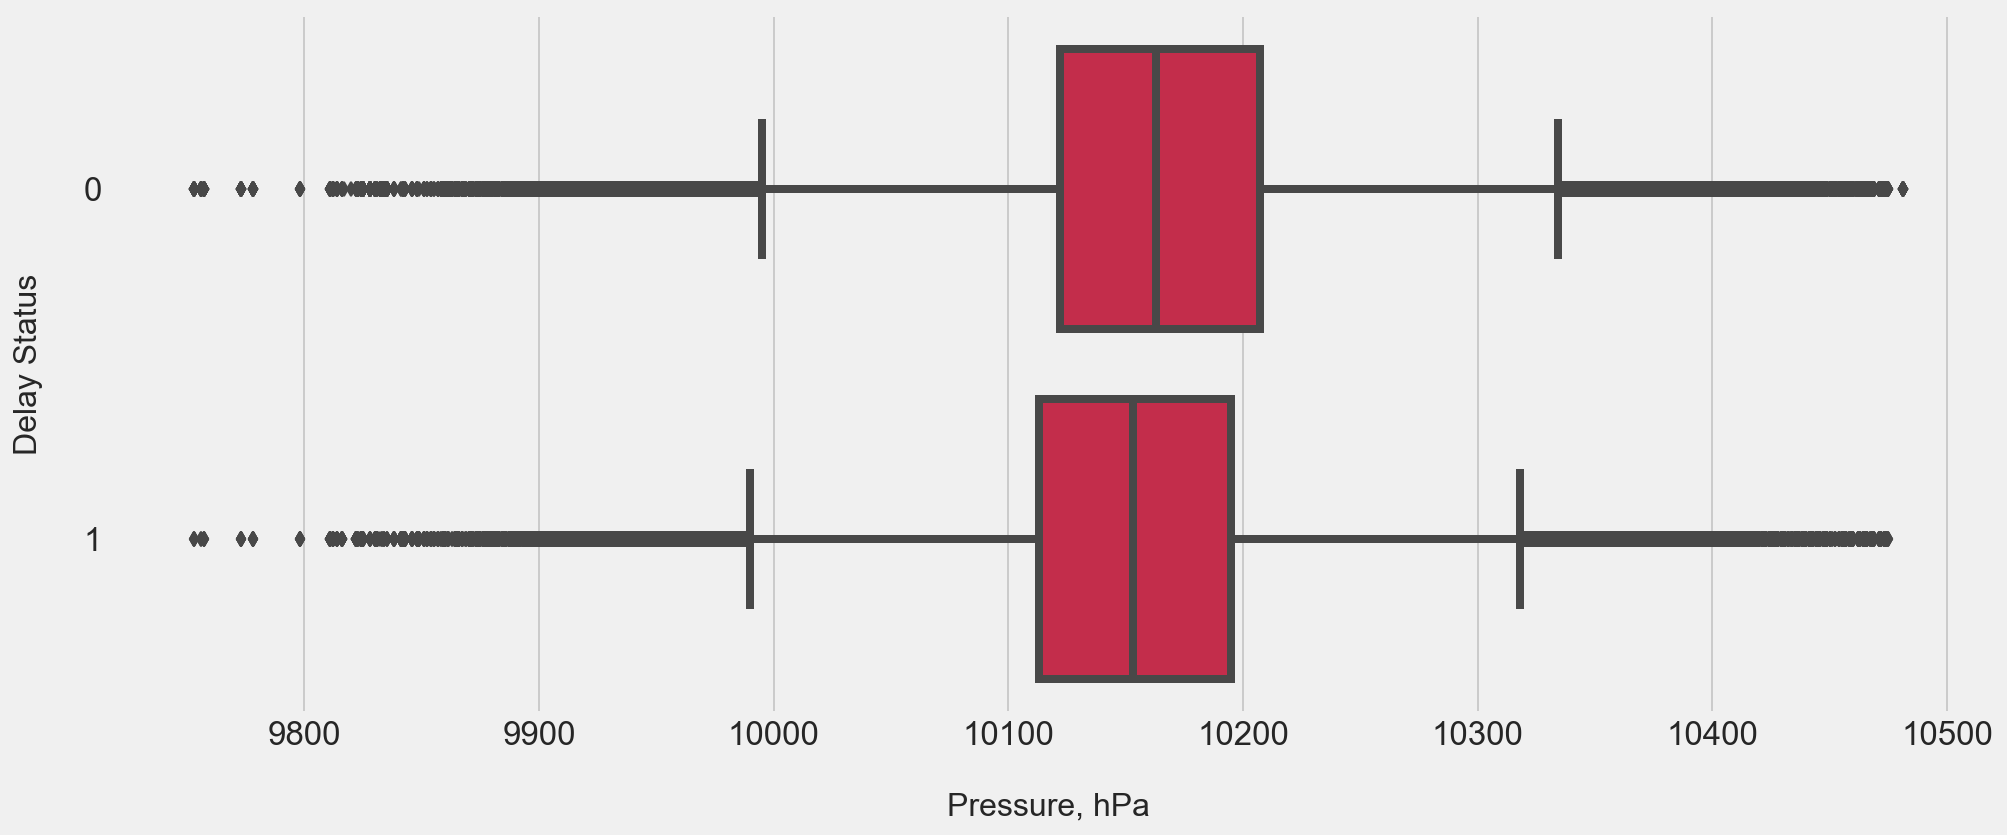

In [32]:
#creating a figure and plotting the distribution of pressure for the different labels
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(x=all_features['pressure'], y=all_features['dep_15_del'],
                    color='crimson', orient='h', ax=ax)
ax.set_xlabel('Pressure, hPa', fontsize=16, labelpad=20)
ax.set_ylabel('Delay Status', fontsize=16, labelpad=20)
plt.show()

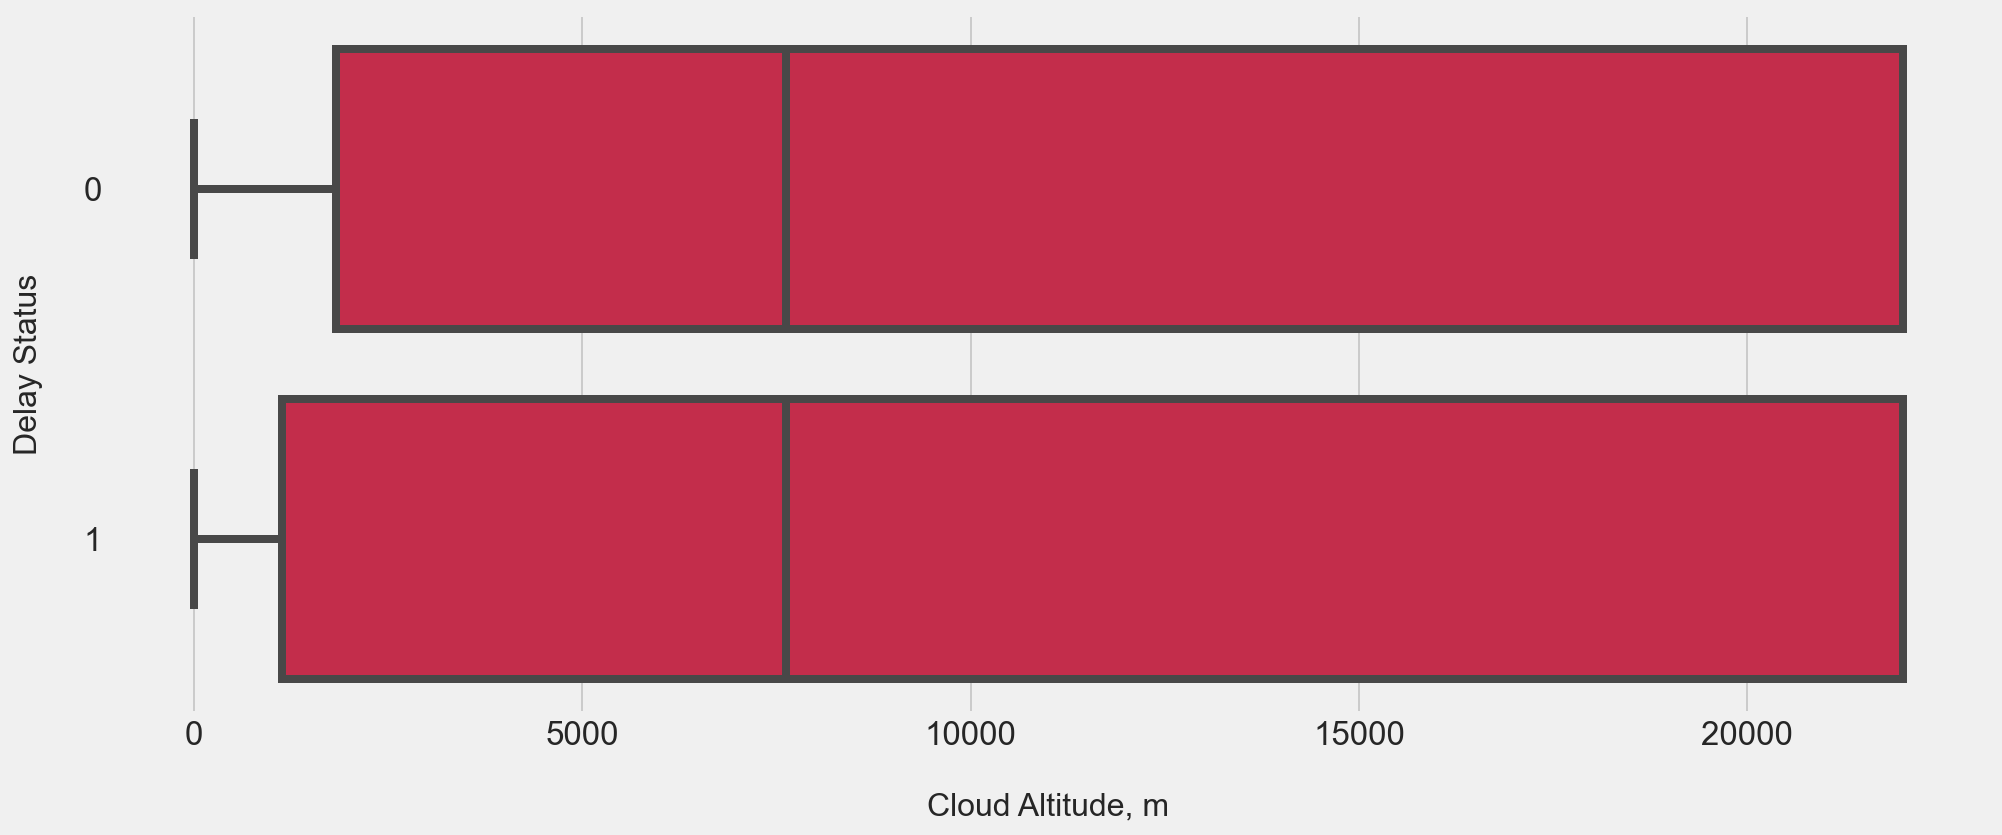

In [33]:
#creating a figure and plotting the distribution of cloud altitude for the different labels
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(x=all_features['cloud_base'], y=all_features['dep_15_del'],
                    color='crimson', orient='h', ax=ax)
ax.set_xlabel('Cloud Altitude, m', fontsize=16, labelpad=20)
ax.set_ylabel('Delay Status', fontsize=16, labelpad=20)
plt.show()

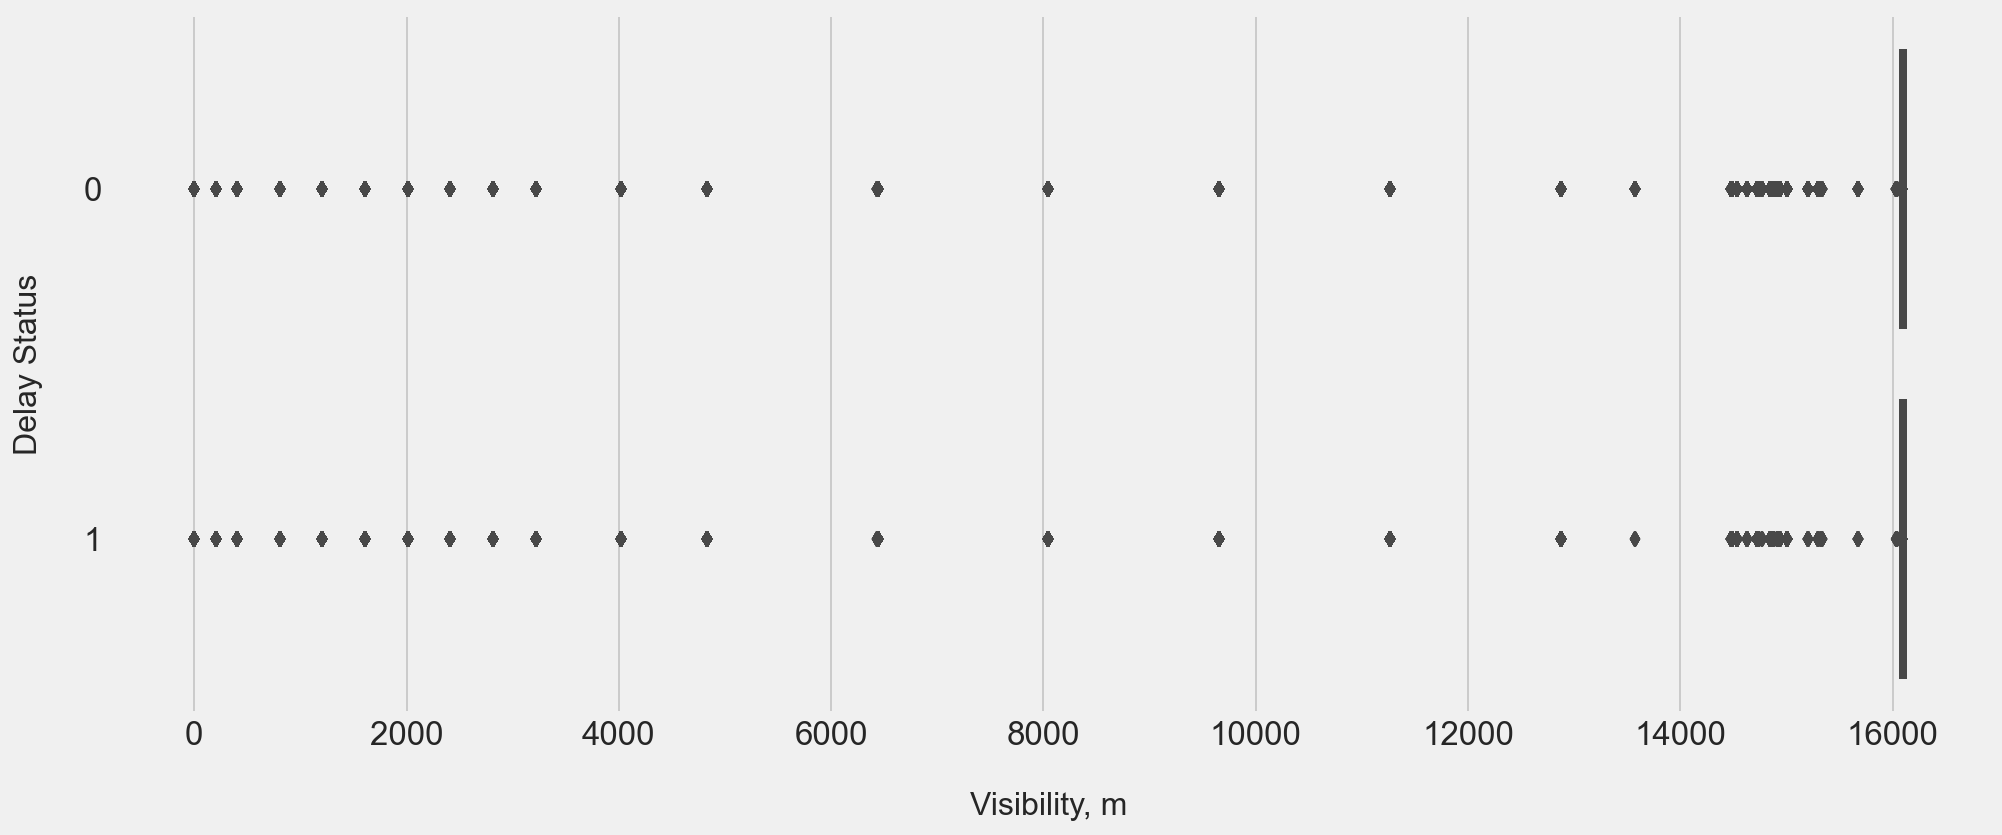

In [34]:
#creating a figure and plotting the distribution of visibility for the different labels
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(x=all_features['visibility'], y=all_features['dep_15_del'],
                    color='crimson', orient='h', ax=ax)
ax.set_xlabel('Visibility, m', fontsize=16, labelpad=20)
ax.set_ylabel('Delay Status', fontsize=16, labelpad=20)
plt.show()

It is clear that the two labels cannot be accurately distinguished from each other by the underlying weather patterns due to high degree of overlap. Once we add the weak relations between the two labels and the different flight features, it is quite clear that making accurate predictions will be a challenging task.

#### Baseline Score

We know that in a classification problem, the baseline score for any model is going to be the percentage of the majority class.

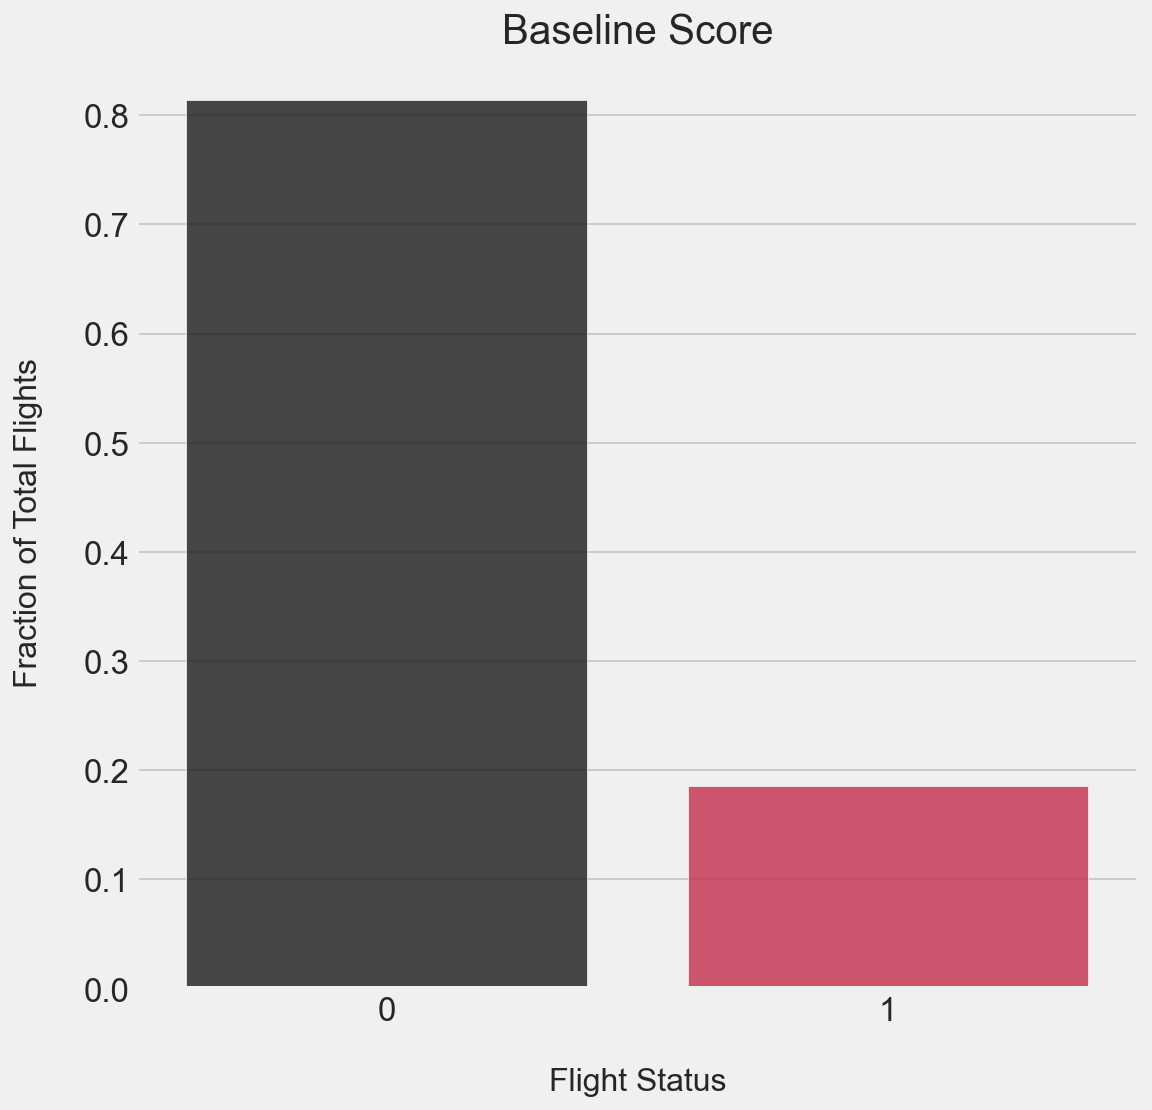

In [35]:
#creating a figure and plotting the distribution of the two labels
fig, ax = plt.subplots(figsize=(8, 8))
sns.barplot(y=all_features['dep_15_del'].value_counts(normalize=True),
                   x=all_features['dep_15_del'].unique(), palette=['k', 'crimson'],
                            alpha=0.8, ax=ax)
ax.set_xlabel('Flight Status', fontsize=16, labelpad=20)
ax.set_ylabel('Fraction of Total Flights', fontsize=16, labelpad=20)
ax.set_title('Baseline Score')
plt.show()

The above figure demonstrates the challenge ahead; we have a very large class imbalance, resulting in a rather high baseline score.